# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os


file = 'multi_round_17params'

#file = 'multi_round_10000_17params_nsf_fake_2104_001_std'


print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
#x_without = torch.load('{}/obs_without.pt'.format(file))

#x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))
#obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu
/home/ubuntu/results


In [7]:
#posterior = posteriors_round[1]

In [8]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((1000,), not_within_prior=False)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/nflows/transforms/lu.py:81: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs.t(), lower, upper=False, unitriangular=True


acceptance rate:  0.0


                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 997 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.00027272727272727274
acceptance rate:  0.00014285714285714287
acceptance rate:  9.67741935483871e-05
acceptance rate:  7.317073170731707e-05
acceptance rate:  5.882352941176471e-05
acceptance rate:  4.9180327868852456e-05
acceptance rate:  4.225352112676056e-05
acceptance rate:  4.938271604938271e-05
acceptance rate:  4.3956043956043955e-05
acceptance rate:  5.9405940594059404e-05
acceptance rate:  5.4054054054054054e-05
acceptance rate:  5.785123966942149e-05
acceptance rate:  5.3435114503816794e-05
acceptance rate:  5.673758865248227e-05
acceptance rate:  5.9602649006622515e-05
acceptance rate:  5.590062111801242e-05
acceptance rate:  6.432748538011695e-05
acceptance rate:  6.0773480662983424e-05
acceptance rate:  5.7591623036649214e-05
acceptance rate:  5.472636815920398e-05
acceptance rate:  5.2132701421800946e-05
acceptance rate:  4.9773755656108595e-05
acceptance rate:  5.194805194805195e-05
acceptance rate:  4.979253112033195e-05
acceptance rate:  5.179282868

acceptance rate:  6.841339155749636e-05
acceptance rate:  6.80830516658619e-05
acceptance rate:  6.775588659298415e-05
acceptance rate:  6.791009086561454e-05
acceptance rate:  6.758686339838172e-05
acceptance rate:  6.726669824727618e-05
acceptance rate:  6.694955209806696e-05
acceptance rate:  6.71046457062412e-05
acceptance rate:  6.679121905651565e-05
acceptance rate:  6.694560669456067e-05
acceptance rate:  6.756131420638594e-05
acceptance rate:  6.817134960847536e-05
acceptance rate:  6.87757909215956e-05
acceptance rate:  6.846188954815152e-05
acceptance rate:  6.860517946388006e-05
acceptance rate:  6.874717322478517e-05
acceptance rate:  6.843764070238631e-05
acceptance rate:  6.81308830121022e-05
acceptance rate:  6.78268630075859e-05
acceptance rate:  6.752554420257663e-05
acceptance rate:  6.811145510835913e-05
acceptance rate:  6.825187142228093e-05
acceptance rate:  6.839105655414292e-05
acceptance rate:  6.896551724137931e-05
acceptance rate:  6.910039113428944e-05
accep

acceptance rate:  6.236350400388255e-05
acceptance rate:  6.221253933672234e-05
acceptance rate:  6.206230379135475e-05
acceptance rate:  6.191279209828957e-05
acceptance rate:  6.176399903869262e-05
acceptance rate:  6.161591944377848e-05
acceptance rate:  6.146854819421191e-05
acceptance rate:  6.156048675733716e-05
acceptance rate:  6.141394905974768e-05
acceptance rate:  6.126810733792449e-05
acceptance rate:  6.11229566453447e-05
acceptance rate:  6.097849208225006e-05
acceptance rate:  6.083470879509549e-05
acceptance rate:  6.069160197600564e-05
acceptance rate:  6.07838535555034e-05
acceptance rate:  6.087567314446266e-05
acceptance rate:  6.073347348750292e-05
acceptance rate:  6.0591936611512465e-05
acceptance rate:  6.045105789351314e-05
acceptance rate:  6.031083275342148e-05
acceptance rate:  6.040268456375839e-05
acceptance rate:  6.026321865619949e-05
acceptance rate:  6.058511863625893e-05
acceptance rate:  6.067570673408412e-05
acceptance rate:  6.076587938546205e-05
a

acceptance rate:  5.8107450089271224e-05
acceptance rate:  5.817533625020256e-05
acceptance rate:  5.824300275036402e-05
acceptance rate:  5.814892586011953e-05
acceptance rate:  5.821641670698274e-05
acceptance rate:  5.812268555788118e-05
acceptance rate:  5.8350747468252694e-05
acceptance rate:  5.8417589471994864e-05
acceptance rate:  5.832398654061849e-05
acceptance rate:  5.855063189889618e-05
acceptance rate:  5.861683437150615e-05
acceptance rate:  5.852336150534205e-05
acceptance rate:  5.843018627607069e-05
acceptance rate:  5.833730726434589e-05
acceptance rate:  5.8244723059831776e-05
acceptance rate:  5.815243226113136e-05
acceptance rate:  5.837683910773612e-05
acceptance rate:  5.828463117990839e-05
acceptance rate:  5.850812174735846e-05
acceptance rate:  5.8573452999527636e-05
acceptance rate:  5.879578682597076e-05
acceptance rate:  5.886046146601789e-05
acceptance rate:  5.876821814762576e-05
acceptance rate:  5.8676263495540605e-05
acceptance rate:  5.85845961568504

acceptance rate:  5.9310680794056755e-05
acceptance rate:  5.9238535457973484e-05
acceptance rate:  5.916656542339935e-05
acceptance rate:  5.909477005217813e-05
acceptance rate:  5.914434613986184e-05
acceptance rate:  5.9072751482871325e-05
acceptance rate:  5.9001329948011126e-05
acceptance rate:  5.893008090810288e-05
acceptance rate:  5.885900373899409e-05
acceptance rate:  5.8788097819539815e-05
acceptance rate:  5.8837684995788715e-05
acceptance rate:  5.876697512318231e-05
acceptance rate:  5.8696435001800506e-05
acceptance rate:  5.874595372257523e-05
acceptance rate:  5.86756077116513e-05
acceptance rate:  5.8605429972491326e-05
acceptance rate:  5.877433998327559e-05
acceptance rate:  5.870421190788689e-05
acceptance rate:  5.8991776903825525e-05
acceptance rate:  5.892155695750506e-05
acceptance rate:  5.885150398287956e-05
acceptance rate:  5.878161738510866e-05
acceptance rate:  5.871189657217412e-05
acceptance rate:  5.876081033052956e-05
acceptance rate:  5.880960833037

acceptance rate:  5.931128670373622e-05
acceptance rate:  5.9253484065880516e-05
acceptance rate:  5.929315548632071e-05
acceptance rate:  5.92354829296761e-05
acceptance rate:  5.94694393159071e-05
acceptance rate:  5.9411707601203764e-05
acceptance rate:  5.9354087867326155e-05
acceptance rate:  5.9393469625036334e-05
acceptance rate:  5.9335979092053045e-05
acceptance rate:  5.927859974857364e-05
acceptance rate:  5.931794029562361e-05
acceptance rate:  5.9453720683331725e-05
acceptance rate:  5.9396393790377014e-05
acceptance rate:  5.93391773432232e-05
acceptance rate:  5.937830815128477e-05
acceptance rate:  5.9321219113546775e-05
acceptance rate:  5.9264239746422056e-05
acceptance rate:  5.9303329814797046e-05
acceptance rate:  5.934234493337168e-05
acceptance rate:  5.92855090508572e-05
acceptance rate:  5.94201511817051e-05
acceptance rate:  5.936334958416977e-05
acceptance rate:  5.940215834208767e-05
acceptance rate:  5.934548230130713e-05
acceptance rate:  5.928891430750167

acceptance rate:  5.97184932064112e-05
acceptance rate:  5.983253394033005e-05
acceptance rate:  5.986516123791731e-05
acceptance rate:  5.989773557341125e-05
acceptance rate:  5.9849160652015246e-05
acceptance rate:  5.988169516246658e-05
acceptance rate:  5.9914176989717434e-05
acceptance rate:  5.9865706658037374e-05
acceptance rate:  5.9978983105650314e-05
acceptance rate:  5.9930538728697195e-05
acceptance rate:  5.988217254458881e-05
acceptance rate:  5.9995161680509635e-05
acceptance rate:  5.9946821368141164e-05
acceptance rate:  5.98985588921987e-05
acceptance rate:  5.9850374064837907e-05
acceptance rate:  5.988264608954264e-05
acceptance rate:  5.991486627580114e-05
acceptance rate:  5.9947034748415056e-05
acceptance rate:  5.9979151631785744e-05
acceptance rate:  5.99310952648025e-05
acceptance rate:  5.996317348490913e-05
acceptance rate:  5.999520038396928e-05
acceptance rate:  6.010710574694269e-05
acceptance rate:  6.005910071080585e-05
acceptance rate:  6.0011172292714

acceptance rate:  6.0637778242969785e-05
acceptance rate:  6.059549543267555e-05
acceptance rate:  6.062295310431329e-05
acceptance rate:  6.058073950282014e-05
acceptance rate:  6.06081692296987e-05
acceptance rate:  6.056602461581253e-05
acceptance rate:  6.059342644708498e-05
acceptance rate:  6.0620790222901186e-05
acceptance rate:  6.0717507459579486e-05
acceptance rate:  6.067540392483184e-05
acceptance rate:  6.063335874159795e-05
acceptance rate:  6.05913717886573e-05
acceptance rate:  6.061864230849076e-05
acceptance rate:  6.0576723601410694e-05
acceptance rate:  6.053486282910649e-05
acceptance rate:  6.049305987155583e-05
acceptance rate:  6.0451314609067694e-05
acceptance rate:  6.040962692228122e-05
acceptance rate:  6.0367996692164565e-05
acceptance rate:  6.032642380001377e-05
acceptance rate:  6.0284908127451656e-05
acceptance rate:  6.03809916787016e-05
acceptance rate:  6.033949556731496e-05
acceptance rate:  6.0298056452166744e-05
acceptance rate:  6.032530368540251

acceptance rate:  6.102253985706432e-05
acceptance rate:  6.09852878334656e-05
acceptance rate:  6.107009944481727e-05


In [9]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [10]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.1

print(diff)

list_min = list(torch.nn.functional.relu(list_min) - diff)
#list_min = list(list_min - diff)
list_max = list(list_max - 2* diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([5.0470e-03, 9.0588e-04, 7.1218e-05, 5.7936e-03, 2.0481e-07, 1.7307e+01,
        4.0449e-09, 1.5581e-05, 1.2942e-03, 3.5107e-02, 9.0239e-05, 6.0257e+01,
        5.5924e-02, 9.3242e-01, 3.2671e-04, 3.5680e-05, 1.1488e+02])
tensor([3.9066e-01, 1.5379e-01, 2.0928e+00, 8.9638e-01, 6.6747e-03, 2.7709e+01,
        4.1990e-05, 3.9364e-02, 2.5898e-02, 1.8897e-01, 1.1678e-01, 6.4264e+01,
        8.6284e+00, 4.0954e+00, 9.4936e-01, 1.5597e-01, 1.2468e+02])
tensor([3.8561e-02, 1.5289e-02, 2.0927e-01, 8.9059e-02, 6.6745e-04, 1.0402e+00,
        4.1986e-06, 3.9349e-03, 2.4604e-03, 1.5386e-02, 1.1669e-02, 4.0071e-01,
        8.5725e-01, 3.1630e-01, 9.4903e-02, 1.5593e-02, 9.8016e-01])


<Figure size 432x288 with 0 Axes>

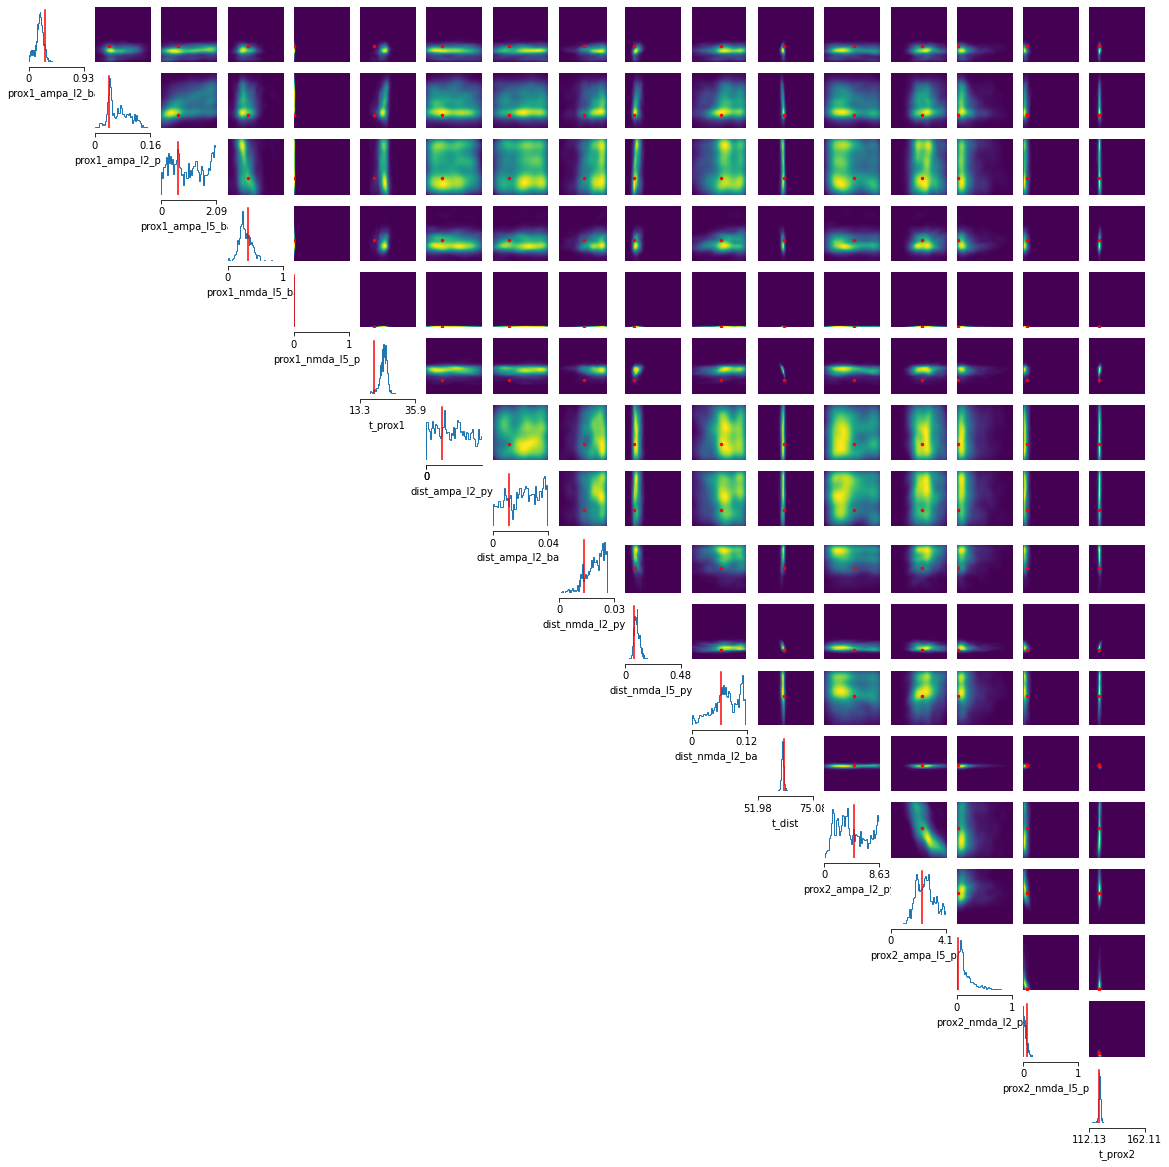

In [11]:
limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)



#for i in range(5):
#    axes[i][i].xaxis.label.set_color('magenta')
#for i in range(5, 12):
#    axes[i][i].xaxis.label.set_color('navy')
#for i in range(12, 17):
#    axes[i][i].xaxis.label.set_color('deeppink')

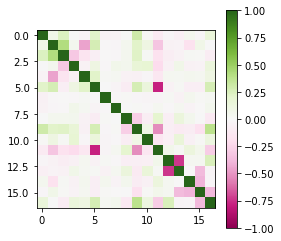

In [12]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [13]:
cond_coeff_mat_list = []


## for the conditional correlation matrix, we had to take the posterior from the second round because leakage was too huge 
## for the third round

#posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))

#posterior = posteriors_round[1]

for i in range(5):
    condition = posterior.sample((1,))
    cond_coeff_mat = conditional_corrcoeff(
        density=posterior,
        condition=condition,
        limits=torch.tensor([[-2., 2.]]*17),
    )
    cond_coeff_mat_list.append(cond_coeff_mat)
    
  

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 0 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  9.999000099990002e-05


                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 9999 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0001
acceptance rate:  5e-05
acceptance rate:  6.666666666666667e-05
acceptance rate:  5e-05
acceptance rate:  6e-05
acceptance rate:  6.666666666666667e-05
acceptance rate:  5.714285714285714e-05
acceptance rate:  5e-05
acceptance rate:  4.4444444444444447e-05
acceptance rate:  5e-05
acceptance rate:  4.545454545454545e-05
acceptance rate:  4.1666666666666665e-05
acceptance rate:  4.615384615384615e-05
acceptance rate:  5e-05
acceptance rate:  6.666666666666667e-05
acceptance rate:  6.25e-05
acceptance rate:  5.882352941176471e-05
acceptance rate:  6.111111111111111e-05
acceptance rate:  6.31578947368421e-05
acceptance rate:  6e-05
acceptance rate:  5.714285714285714e-05
acceptance rate:  5.4545454545454546e-05
acceptance rate:  5.217391304347826e-05
acceptance rate:  5.4166666666666664e-05
acceptance rate:  5.6e-05
acceptance rate:  6.538461538461539e-05
acceptance rate:  6.666666666666667e-05
acceptance rate:  6.785714285714286e-05
acceptance rate:  6.89655172413

acceptance rate:  6.837209302325581e-05
acceptance rate:  6.805555555555555e-05
acceptance rate:  6.774193548387096e-05
acceptance rate:  6.788990825688073e-05
acceptance rate:  6.757990867579909e-05
acceptance rate:  6.727272727272727e-05
acceptance rate:  6.832579185520362e-05
acceptance rate:  6.801801801801802e-05
acceptance rate:  6.816143497757848e-05
acceptance rate:  6.785714285714286e-05
acceptance rate:  6.755555555555555e-05
acceptance rate:  6.769911504424779e-05
acceptance rate:  6.784140969162996e-05
acceptance rate:  6.798245614035087e-05
acceptance rate:  6.768558951965065e-05
acceptance rate:  6.739130434782608e-05
acceptance rate:  6.70995670995671e-05
acceptance rate:  6.681034482758621e-05
acceptance rate:  6.652360515021459e-05
acceptance rate:  6.623931623931624e-05
acceptance rate:  6.595744680851063e-05
acceptance rate:  6.610169491525424e-05
acceptance rate:  6.582278481012659e-05
acceptance rate:  6.554621848739496e-05
acceptance rate:  6.569037656903766e-05
a

acceptance rate:  6.690307328605201e-05
acceptance rate:  6.69811320754717e-05
acceptance rate:  6.68235294117647e-05
acceptance rate:  6.666666666666667e-05
acceptance rate:  6.651053864168618e-05
acceptance rate:  6.635514018691589e-05
acceptance rate:  6.62004662004662e-05
acceptance rate:  6.627906976744186e-05
acceptance rate:  6.682134570765661e-05
acceptance rate:  6.689814814814815e-05
acceptance rate:  6.674364896073904e-05
acceptance rate:  6.658986175115207e-05
acceptance rate:  6.64367816091954e-05
acceptance rate:  6.651376146788991e-05
acceptance rate:  6.636155606407323e-05
acceptance rate:  6.643835616438357e-05
acceptance rate:  6.62870159453303e-05
acceptance rate:  6.613636363636363e-05
acceptance rate:  6.598639455782313e-05
acceptance rate:  6.583710407239819e-05
acceptance rate:  6.591422121896163e-05
acceptance rate:  6.576576576576577e-05
acceptance rate:  6.584269662921349e-05
acceptance rate:  6.5695067264574e-05
acceptance rate:  6.554809843400448e-05
accepta

acceptance rate:  6.481774960380348e-05
acceptance rate:  6.471518987341772e-05
acceptance rate:  6.477093206951027e-05
acceptance rate:  6.498422712933754e-05
acceptance rate:  6.503937007874015e-05
acceptance rate:  6.525157232704402e-05
acceptance rate:  6.530612244897959e-05
acceptance rate:  6.52037617554859e-05
acceptance rate:  6.510172143974961e-05
acceptance rate:  6.5e-05
acceptance rate:  6.489859594383775e-05
acceptance rate:  6.510903426791277e-05
acceptance rate:  6.500777604976672e-05
acceptance rate:  6.506211180124224e-05
acceptance rate:  6.496124031007752e-05
acceptance rate:  6.486068111455108e-05
acceptance rate:  6.476043276661514e-05
acceptance rate:  6.481481481481482e-05
acceptance rate:  6.486902927580894e-05
acceptance rate:  6.492307692307692e-05
acceptance rate:  6.497695852534563e-05
acceptance rate:  6.487730061349693e-05
acceptance rate:  6.493108728943339e-05
acceptance rate:  6.498470948012233e-05
acceptance rate:  6.50381679389313e-05
acceptance rate:

acceptance rate:  6.32896305125149e-05
acceptance rate:  6.333333333333333e-05
acceptance rate:  6.325802615933412e-05
acceptance rate:  6.318289786223278e-05
acceptance rate:  6.310794780545671e-05
acceptance rate:  6.303317535545023e-05
acceptance rate:  6.29585798816568e-05
acceptance rate:  6.288416075650119e-05
acceptance rate:  6.29279811097993e-05
acceptance rate:  6.308962264150943e-05
acceptance rate:  6.301531213191991e-05
acceptance rate:  6.294117647058823e-05
acceptance rate:  6.286721504112809e-05
acceptance rate:  6.279342723004695e-05
acceptance rate:  6.27198124267292e-05
acceptance rate:  6.276346604215457e-05
acceptance rate:  6.269005847953217e-05
acceptance rate:  6.261682242990654e-05
acceptance rate:  6.254375729288214e-05
acceptance rate:  6.258741258741259e-05
acceptance rate:  6.251455180442375e-05
acceptance rate:  6.255813953488372e-05
acceptance rate:  6.248548199767712e-05
acceptance rate:  6.241299303944315e-05
acceptance rate:  6.23406720741599e-05
accep

acceptance rate:  6.189111747851003e-05
acceptance rate:  6.192748091603053e-05
acceptance rate:  6.196377502383222e-05
acceptance rate:  6.19047619047619e-05
acceptance rate:  6.194100856327308e-05
acceptance rate:  6.188212927756654e-05
acceptance rate:  6.191832858499526e-05
acceptance rate:  6.18595825426945e-05
acceptance rate:  6.180094786729858e-05
acceptance rate:  6.183712121212122e-05
acceptance rate:  6.19678334910123e-05
acceptance rate:  6.200378071833648e-05
acceptance rate:  6.203966005665722e-05
acceptance rate:  6.19811320754717e-05
acceptance rate:  6.192271442035815e-05
acceptance rate:  6.186440677966101e-05
acceptance rate:  6.19002822201317e-05
acceptance rate:  6.193609022556392e-05
acceptance rate:  6.206572769953051e-05
acceptance rate:  6.200750469043151e-05
acceptance rate:  6.194939081537019e-05
acceptance rate:  6.189138576779026e-05
acceptance rate:  6.183348924228251e-05
acceptance rate:  6.196261682242991e-05
acceptance rate:  6.199813258636788e-05
accep

acceptance rate:  6.183266932270917e-05
acceptance rate:  6.194267515923567e-05
acceptance rate:  6.197295147175815e-05
acceptance rate:  6.200317965023847e-05
acceptance rate:  6.203335980937252e-05
acceptance rate:  6.198412698412698e-05
acceptance rate:  6.19349722442506e-05
acceptance rate:  6.196513470681458e-05
acceptance rate:  6.191607284243863e-05
acceptance rate:  6.186708860759493e-05
acceptance rate:  6.181818181818182e-05
acceptance rate:  6.17693522906793e-05
acceptance rate:  6.179952644041043e-05
acceptance rate:  6.175078864353312e-05
acceptance rate:  6.178092986603624e-05
acceptance rate:  6.181102362204724e-05
acceptance rate:  6.176239181746656e-05
acceptance rate:  6.171383647798742e-05
acceptance rate:  6.166535742340927e-05
acceptance rate:  6.161695447409733e-05
acceptance rate:  6.156862745098039e-05
acceptance rate:  6.15987460815047e-05
acceptance rate:  6.162881754111198e-05
acceptance rate:  6.158059467918623e-05
acceptance rate:  6.153244722439405e-05
acc

acceptance rate:  6.138072453861927e-05
acceptance rate:  6.133879781420764e-05
acceptance rate:  6.129692832764505e-05
acceptance rate:  6.125511596180081e-05
acceptance rate:  6.134969325153375e-05
acceptance rate:  6.144414168937329e-05
acceptance rate:  6.140231449965964e-05
acceptance rate:  6.142857142857143e-05
acceptance rate:  6.145479265805574e-05
acceptance rate:  6.148097826086957e-05
acceptance rate:  6.15071283095723e-05
acceptance rate:  6.146540027137042e-05
acceptance rate:  6.142372881355932e-05
acceptance rate:  6.138211382113821e-05
acceptance rate:  6.147596479350034e-05
acceptance rate:  6.143437077131259e-05
acceptance rate:  6.14604462474645e-05
acceptance rate:  6.148648648648649e-05
acceptance rate:  6.144496961512492e-05
acceptance rate:  6.140350877192983e-05
acceptance rate:  6.136210384356035e-05
acceptance rate:  6.132075471698113e-05
acceptance rate:  6.134680134680135e-05
acceptance rate:  6.150740242261104e-05
acceptance rate:  6.146603900470746e-05
ac

acceptance rate:  6.193895870736086e-05
acceptance rate:  6.190191387559808e-05
acceptance rate:  6.186491332934847e-05
acceptance rate:  6.182795698924732e-05
acceptance rate:  6.179104477611941e-05
acceptance rate:  6.175417661097852e-05
acceptance rate:  6.171735241502684e-05
acceptance rate:  6.168057210965435e-05
acceptance rate:  6.176295413936867e-05
acceptance rate:  6.178571428571428e-05
acceptance rate:  6.180844735276621e-05
acceptance rate:  6.177170035671819e-05
acceptance rate:  6.173499702911468e-05
acceptance rate:  6.169833729216152e-05
acceptance rate:  6.166172106824926e-05
acceptance rate:  6.168446026097271e-05
acceptance rate:  6.170717249555424e-05
acceptance rate:  6.184834123222749e-05
acceptance rate:  6.198934280639432e-05
acceptance rate:  6.19526627218935e-05
acceptance rate:  6.197516262566528e-05
acceptance rate:  6.193853427895981e-05
acceptance rate:  6.20200826934436e-05
acceptance rate:  6.198347107438017e-05
acceptance rate:  6.194690265486725e-05
ac

acceptance rate:  6.153436334576452e-05
acceptance rate:  6.150159744408946e-05
acceptance rate:  6.146886641830761e-05
acceptance rate:  6.148936170212766e-05
acceptance rate:  6.150983519404571e-05
acceptance rate:  6.153028692879915e-05
acceptance rate:  6.149761019649496e-05
acceptance rate:  6.157112526539278e-05
acceptance rate:  6.159151193633953e-05
acceptance rate:  6.16118769883351e-05
acceptance rate:  6.157922628510864e-05
acceptance rate:  6.154661016949152e-05
acceptance rate:  6.151402858655373e-05
acceptance rate:  6.148148148148148e-05
acceptance rate:  6.150185087255421e-05
acceptance rate:  6.14693446088795e-05
acceptance rate:  6.154252509244586e-05
acceptance rate:  6.156282998944034e-05
acceptance rate:  6.153034300791557e-05
acceptance rate:  6.155063291139241e-05
acceptance rate:  6.157090142329994e-05
acceptance rate:  6.153846153846154e-05
acceptance rate:  6.161137440758294e-05
acceptance rate:  6.157894736842106e-05
acceptance rate:  6.154655444502893e-05
ac

acceptance rate:  6.154584733557369e-05
acceptance rate:  6.151631477927063e-05
acceptance rate:  6.148681055155875e-05
acceptance rate:  6.145733461169702e-05
acceptance rate:  6.142788691902252e-05
acceptance rate:  6.139846743295019e-05
acceptance rate:  6.136907611297271e-05
acceptance rate:  6.133971291866028e-05
acceptance rate:  6.13582018173123e-05
acceptance rate:  6.132887189292543e-05
acceptance rate:  6.139512661251792e-05
acceptance rate:  6.13658070678128e-05
acceptance rate:  6.133651551312649e-05
acceptance rate:  6.135496183206107e-05
acceptance rate:  6.137339055793991e-05
acceptance rate:  6.13441372735939e-05
acceptance rate:  6.136255359695093e-05
acceptance rate:  6.142857142857143e-05
acceptance rate:  6.149452641599238e-05
acceptance rate:  6.146527117031398e-05
acceptance rate:  6.143604374702805e-05
acceptance rate:  6.145437262357414e-05
acceptance rate:  6.152019002375297e-05
acceptance rate:  6.153846153846154e-05
acceptance rate:  6.15092548647366e-05
acce

acceptance rate:  6.15989515072084e-05
acceptance rate:  6.157205240174672e-05
acceptance rate:  6.163247490178961e-05
acceptance rate:  6.160558464223385e-05
acceptance rate:  6.157871783689489e-05
acceptance rate:  6.155187445510026e-05
acceptance rate:  6.152505446623094e-05
acceptance rate:  6.158536585365854e-05
acceptance rate:  6.155855463648237e-05
acceptance rate:  6.153176675369887e-05
acceptance rate:  6.154849934754242e-05
acceptance rate:  6.156521739130435e-05
acceptance rate:  6.162538026944807e-05
acceptance rate:  6.164205039096438e-05
acceptance rate:  6.1615284411637e-05
acceptance rate:  6.163194444444445e-05
acceptance rate:  6.160520607375271e-05
acceptance rate:  6.157849089332177e-05
acceptance rate:  6.155179887299523e-05
acceptance rate:  6.152512998266897e-05
acceptance rate:  6.149848419229104e-05
acceptance rate:  6.151515151515151e-05
acceptance rate:  6.157507572479446e-05
acceptance rate:  6.15916955017301e-05
acceptance rate:  6.165153480328577e-05
acce

acceptance rate:  6.23246492985972e-05
acceptance rate:  6.229967948717949e-05
acceptance rate:  6.227472967561074e-05
acceptance rate:  6.22497998398719e-05
acceptance rate:  6.22248899559824e-05
acceptance rate:  6.22e-05
acceptance rate:  6.221511395441823e-05
acceptance rate:  6.227018385291767e-05
acceptance rate:  6.224530563324011e-05
acceptance rate:  6.222044728434504e-05
acceptance rate:  6.219560878243513e-05
acceptance rate:  6.2170790103751e-05
acceptance rate:  6.21459912245712e-05
acceptance rate:  6.216108452950558e-05
acceptance rate:  6.217616580310881e-05
acceptance rate:  6.223107569721116e-05
acceptance rate:  6.224611708482677e-05
acceptance rate:  6.222133757961784e-05
acceptance rate:  6.219657779546359e-05
acceptance rate:  6.221161495624503e-05
acceptance rate:  6.222664015904572e-05
acceptance rate:  6.220190779014309e-05
acceptance rate:  6.21771950735002e-05
acceptance rate:  6.219221604447974e-05
acceptance rate:  6.216752679634776e-05
acceptance rate:  6.

acceptance rate:  6.293007769145395e-05
acceptance rate:  6.290680473372781e-05
acceptance rate:  6.288354898336414e-05
acceptance rate:  6.286031042128603e-05
acceptance rate:  6.283708902844477e-05
acceptance rate:  6.285081240768095e-05
acceptance rate:  6.290143964562569e-05
acceptance rate:  6.287822878228782e-05
acceptance rate:  6.289192180007378e-05
acceptance rate:  6.286873156342183e-05
acceptance rate:  6.288241798746774e-05
acceptance rate:  6.285924834193074e-05
acceptance rate:  6.29097605893186e-05
acceptance rate:  6.292341678939618e-05
acceptance rate:  6.290025763709975e-05
acceptance rate:  6.287711552612214e-05
acceptance rate:  6.28539904376609e-05
acceptance rate:  6.283088235294118e-05
acceptance rate:  6.284454244762955e-05
acceptance rate:  6.282145481263776e-05
acceptance rate:  6.279838413514506e-05
acceptance rate:  6.281204111600587e-05
acceptance rate:  6.278899082568807e-05
acceptance rate:  6.28026412325752e-05
acceptance rate:  6.277961129446278e-05
acc

acceptance rate:  6.325197662426951e-05
acceptance rate:  6.323024054982817e-05
acceptance rate:  6.320851940913775e-05
acceptance rate:  6.32554945054945e-05
acceptance rate:  6.323377960865088e-05
acceptance rate:  6.324639670555936e-05
acceptance rate:  6.329331046312178e-05
acceptance rate:  6.334019204389575e-05
acceptance rate:  6.331847788824134e-05
acceptance rate:  6.329677861549006e-05
acceptance rate:  6.3275094210346e-05
acceptance rate:  6.325342465753425e-05
acceptance rate:  6.326600479287915e-05
acceptance rate:  6.32785763175907e-05
acceptance rate:  6.325692781388984e-05
acceptance rate:  6.326949384404925e-05
acceptance rate:  6.324786324786325e-05
acceptance rate:  6.326042378673957e-05
acceptance rate:  6.323881106935429e-05
acceptance rate:  6.325136612021858e-05
acceptance rate:  6.326391259815637e-05
acceptance rate:  6.324232081911262e-05
acceptance rate:  6.322074377345616e-05
acceptance rate:  6.326739427012278e-05
acceptance rate:  6.32799181725196e-05
accep

acceptance rate:  6.333012512030799e-05
acceptance rate:  6.330981398332264e-05
acceptance rate:  6.328951587047131e-05
acceptance rate:  6.326923076923077e-05
acceptance rate:  6.324895866709388e-05
acceptance rate:  6.32286995515695e-05
acceptance rate:  6.320845341018252e-05
acceptance rate:  6.318822023047376e-05
acceptance rate:  6.3168e-05
acceptance rate:  6.314779270633397e-05
acceptance rate:  6.31595778701631e-05
acceptance rate:  6.313938618925831e-05
acceptance rate:  6.311920741450943e-05
acceptance rate:  6.309904153354632e-05
acceptance rate:  6.30788885340147e-05
acceptance rate:  6.305874840357599e-05
acceptance rate:  6.303862112990744e-05
acceptance rate:  6.305041480536057e-05
acceptance rate:  6.30622009569378e-05
acceptance rate:  6.307397959183674e-05
acceptance rate:  6.305387312719158e-05
acceptance rate:  6.303377947737412e-05
acceptance rate:  6.304555590952533e-05
acceptance rate:  6.302547770700637e-05
acceptance rate:  6.303724928366763e-05
acceptance rate

acceptance rate:  6.318796992481203e-05
acceptance rate:  6.316897173782321e-05
acceptance rate:  6.314998497144574e-05
acceptance rate:  6.316105769230769e-05
acceptance rate:  6.314208471012317e-05
acceptance rate:  6.312312312312312e-05
acceptance rate:  6.316421495046533e-05
acceptance rate:  6.317527010804322e-05
acceptance rate:  6.318631863186319e-05
acceptance rate:  6.316736652669466e-05
acceptance rate:  6.314842578710645e-05
acceptance rate:  6.31294964028777e-05
acceptance rate:  6.317051243632004e-05
acceptance rate:  6.318154583582984e-05
acceptance rate:  6.316262353998203e-05
acceptance rate:  6.317365269461077e-05
acceptance rate:  6.315474408859622e-05
acceptance rate:  6.313584679832436e-05
acceptance rate:  6.311696081364044e-05
acceptance rate:  6.309808612440192e-05
acceptance rate:  6.310911808669656e-05
acceptance rate:  6.309025702331141e-05
acceptance rate:  6.307140723035554e-05
acceptance rate:  6.305256869772999e-05
acceptance rate:  6.309346073454763e-05
a

acceptance rate:  6.264514301897479e-05
acceptance rate:  6.262740656851642e-05
acceptance rate:  6.260968015850552e-05
acceptance rate:  6.259196378041879e-05
acceptance rate:  6.257425742574258e-05
acceptance rate:  6.258484162895927e-05
acceptance rate:  6.256714729997173e-05
acceptance rate:  6.254946297343132e-05
acceptance rate:  6.256004521051144e-05
acceptance rate:  6.259887005649717e-05
acceptance rate:  6.260943236373906e-05
acceptance rate:  6.261998870694523e-05
acceptance rate:  6.265876375952582e-05
acceptance rate:  6.266930022573363e-05
acceptance rate:  6.265162200282088e-05
acceptance rate:  6.263395375070502e-05
acceptance rate:  6.26444882999718e-05
acceptance rate:  6.271138669673055e-05
acceptance rate:  6.272189349112427e-05
acceptance rate:  6.270422535211268e-05
acceptance rate:  6.271472824556462e-05
acceptance rate:  6.269707207207208e-05
acceptance rate:  6.267942583732058e-05
acceptance rate:  6.271806415306696e-05
acceptance rate:  6.270042194092828e-05
a

acceptance rate:  6.250334313987697e-05
acceptance rate:  6.254010695187166e-05
acceptance rate:  6.255012028869287e-05
acceptance rate:  6.253340459647247e-05
acceptance rate:  6.259684744857066e-05
acceptance rate:  6.258012820512821e-05
acceptance rate:  6.261682242990654e-05
acceptance rate:  6.260010678056593e-05
acceptance rate:  6.261008807045636e-05
acceptance rate:  6.264674493062967e-05
acceptance rate:  6.263003467591358e-05
acceptance rate:  6.261333333333334e-05
acceptance rate:  6.259664089576113e-05
acceptance rate:  6.257995735607676e-05
acceptance rate:  6.258992805755396e-05
acceptance rate:  6.259989344698988e-05
acceptance rate:  6.25832223701731e-05
acceptance rate:  6.264643237486688e-05
acceptance rate:  6.262975778546713e-05
acceptance rate:  6.263970196913251e-05
acceptance rate:  6.262303804203246e-05
acceptance rate:  6.26595744680851e-05
acceptance rate:  6.26960914650359e-05
acceptance rate:  6.267942583732058e-05
acceptance rate:  6.26627690672336e-05
acce

acceptance rate:  6.207246009627565e-05
acceptance rate:  6.208206686930091e-05
acceptance rate:  6.206634591035705e-05
acceptance rate:  6.207594936708861e-05
acceptance rate:  6.208554796254113e-05
acceptance rate:  6.209514170040486e-05
acceptance rate:  6.21047305843663e-05
acceptance rate:  6.208902377339403e-05
acceptance rate:  6.212389380530973e-05
acceptance rate:  6.210819009100101e-05
acceptance rate:  6.209249431387415e-05
acceptance rate:  6.210207175341081e-05
acceptance rate:  6.208638545087143e-05
acceptance rate:  6.20959595959596e-05
acceptance rate:  6.21055289068417e-05
acceptance rate:  6.21150933871782e-05
acceptance rate:  6.209941963159223e-05
acceptance rate:  6.210898082744702e-05
acceptance rate:  6.209331651954602e-05
acceptance rate:  6.207766011094302e-05
acceptance rate:  6.206201159566422e-05
acceptance rate:  6.204637096774194e-05
acceptance rate:  6.205593348450492e-05
acceptance rate:  6.206549118387909e-05
acceptance rate:  6.204986149584488e-05
acce

acceptance rate:  6.183481820370816e-05
acceptance rate:  6.18440057775638e-05
acceptance rate:  6.18531889290012e-05
acceptance rate:  6.183830606352262e-05
acceptance rate:  6.184748616790955e-05
acceptance rate:  6.183261183261184e-05
acceptance rate:  6.184178889156047e-05
acceptance rate:  6.182692307692307e-05
acceptance rate:  6.183609709204519e-05
acceptance rate:  6.18212397885632e-05
acceptance rate:  6.180638962286812e-05
acceptance rate:  6.181556195965418e-05
acceptance rate:  6.180072028811524e-05
acceptance rate:  6.178588574171868e-05
acceptance rate:  6.177105831533477e-05
acceptance rate:  6.175623800383877e-05
acceptance rate:  6.174142480211082e-05
acceptance rate:  6.172661870503597e-05
acceptance rate:  6.171181970750419e-05
acceptance rate:  6.169702780441036e-05
acceptance rate:  6.170620656601966e-05
acceptance rate:  6.169142309535219e-05
acceptance rate:  6.167664670658683e-05
acceptance rate:  6.168582375478928e-05
acceptance rate:  6.169499640890591e-05
acc

acceptance rate:  6.175728378068364e-05
acceptance rate:  6.174311926605505e-05
acceptance rate:  6.175189176794313e-05
acceptance rate:  6.176066024759285e-05
acceptance rate:  6.176942470776989e-05
acceptance rate:  6.180109990834097e-05
acceptance rate:  6.178694158075601e-05
acceptance rate:  6.177278973889143e-05
acceptance rate:  6.180444240897642e-05
acceptance rate:  6.179029304029304e-05
acceptance rate:  6.177615014877547e-05
acceptance rate:  6.176201372997711e-05
acceptance rate:  6.17478837794555e-05
acceptance rate:  6.175663311985362e-05
acceptance rate:  6.174251086210839e-05
acceptance rate:  6.17283950617284e-05
acceptance rate:  6.173714285714286e-05
acceptance rate:  6.172303473491773e-05
acceptance rate:  6.170893305917295e-05
acceptance rate:  6.1717679305619e-05
acceptance rate:  6.1703585293446e-05
acceptance rate:  6.171232876712329e-05
acceptance rate:  6.172106824925816e-05
acceptance rate:  6.175262437243268e-05
acceptance rate:  6.176135067305499e-05
accept

acceptance rate:  6.181818181818182e-05
acceptance rate:  6.182654402102497e-05
acceptance rate:  6.181300634990147e-05
acceptance rate:  6.179947460595447e-05
acceptance rate:  6.182972203983366e-05
acceptance rate:  6.181619256017506e-05
acceptance rate:  6.18245460511923e-05
acceptance rate:  6.1832895888014e-05
acceptance rate:  6.18631095560901e-05
acceptance rate:  6.189331001311762e-05
acceptance rate:  6.192349726775956e-05
acceptance rate:  6.190996503496503e-05
acceptance rate:  6.191828708761197e-05
acceptance rate:  6.19047619047619e-05
acceptance rate:  6.189124262939506e-05
acceptance rate:  6.187772925764192e-05
acceptance rate:  6.186422178563633e-05
acceptance rate:  6.185072020951549e-05
acceptance rate:  6.185904429413049e-05
acceptance rate:  6.18455497382199e-05
acceptance rate:  6.185387131952018e-05
acceptance rate:  6.184038377671174e-05
acceptance rate:  6.18269021146719e-05
acceptance rate:  6.183522231909329e-05
acceptance rate:  6.182174765744171e-05
accepta

acceptance rate:  6.199958080067071e-05
acceptance rate:  6.198658843252306e-05
acceptance rate:  6.197360150848523e-05
acceptance rate:  6.196062002513616e-05
acceptance rate:  6.194764397905759e-05
acceptance rate:  6.199748743718593e-05
acceptance rate:  6.198450910613356e-05
acceptance rate:  6.197153620761824e-05
acceptance rate:  6.195856873822976e-05
acceptance rate:  6.198744769874476e-05
acceptance rate:  6.199539845220665e-05
acceptance rate:  6.204516938519448e-05
acceptance rate:  6.203219736567008e-05
acceptance rate:  6.201923076923077e-05
acceptance rate:  6.202716823406479e-05
acceptance rate:  6.201420810697869e-05
acceptance rate:  6.20221433047838e-05
acceptance rate:  6.200918964076859e-05
acceptance rate:  6.199624138651075e-05
acceptance rate:  6.20250521920668e-05
acceptance rate:  6.20121060321436e-05
acceptance rate:  6.19991652754591e-05
acceptance rate:  6.198622991863133e-05
acceptance rate:  6.197329995828118e-05
acceptance rate:  6.200208550573514e-05
acce

acceptance rate:  6.204540888085191e-05
acceptance rate:  6.203294495781438e-05
acceptance rate:  6.204057039566178e-05
acceptance rate:  6.204819277108433e-05
acceptance rate:  6.20357357960249e-05
acceptance rate:  6.202328382175833e-05
acceptance rate:  6.205097330925145e-05
acceptance rate:  6.203852327447833e-05
acceptance rate:  6.204613841524573e-05
acceptance rate:  6.205375050140393e-05
acceptance rate:  6.204130739923802e-05
acceptance rate:  6.204891740176423e-05
acceptance rate:  6.205652435357787e-05
acceptance rate:  6.208416833667335e-05
acceptance rate:  6.207172911240233e-05
acceptance rate:  6.207932692307692e-05
acceptance rate:  6.206689365111155e-05
acceptance rate:  6.209451341609931e-05
acceptance rate:  6.21021021021021e-05
acceptance rate:  6.208967173738991e-05
acceptance rate:  6.207724634780868e-05
acceptance rate:  6.206482593037214e-05
acceptance rate:  6.205241048209641e-05
acceptance rate:  6.204e-05
acceptance rate:  6.204759048190362e-05
acceptance rat

acceptance rate:  6.201041867644221e-05
acceptance rate:  6.199845679012345e-05
acceptance rate:  6.202507232401157e-05
acceptance rate:  6.201311222522175e-05
acceptance rate:  6.202043570464624e-05
acceptance rate:  6.200848111025444e-05
acceptance rate:  6.199653112353054e-05
acceptance rate:  6.202312138728324e-05
acceptance rate:  6.206896551724138e-05
acceptance rate:  6.209553158705701e-05
acceptance rate:  6.208357404197958e-05
acceptance rate:  6.21101270696958e-05
acceptance rate:  6.209817131857555e-05
acceptance rate:  6.208622016936104e-05
acceptance rate:  6.20742736193958e-05
acceptance rate:  6.206233166602539e-05
acceptance rate:  6.206962877476438e-05
acceptance rate:  6.205769230769231e-05
acceptance rate:  6.20457604306864e-05
acceptance rate:  6.203383314109957e-05
acceptance rate:  6.204113011724006e-05
acceptance rate:  6.202920830130669e-05
acceptance rate:  6.201729106628242e-05
acceptance rate:  6.202458701498271e-05
acceptance rate:  6.201267524486268e-05
acc

acceptance rate:  6.223789200222676e-05
acceptance rate:  6.222634508348795e-05
acceptance rate:  6.221480244852532e-05
acceptance rate:  6.220326409495549e-05
acceptance rate:  6.219173002039681e-05
acceptance rate:  6.219873934000742e-05
acceptance rate:  6.218721037998147e-05
acceptance rate:  6.217568569310601e-05
acceptance rate:  6.216416527700574e-05
acceptance rate:  6.215264912930715e-05
acceptance rate:  6.214113724763845e-05
acceptance rate:  6.214814814814814e-05
acceptance rate:  6.213664136271061e-05
acceptance rate:  6.216216216216216e-05
acceptance rate:  6.218767351471404e-05
acceptance rate:  6.219467061435973e-05
acceptance rate:  6.220166512488436e-05
acceptance rate:  6.219015908250093e-05
acceptance rate:  6.219715184020714e-05
acceptance rate:  6.222263313609467e-05
acceptance rate:  6.22296173044925e-05
acceptance rate:  6.22365988909427e-05
acceptance rate:  6.224357789687674e-05
acceptance rate:  6.225055432372506e-05
acceptance rate:  6.225752817291705e-05
ac

acceptance rate:  6.20017873100983e-05
acceptance rate:  6.200857755539672e-05
acceptance rate:  6.199749865999643e-05
acceptance rate:  6.200428724544481e-05
acceptance rate:  6.199321307376317e-05
acceptance rate:  6.198214285714285e-05
acceptance rate:  6.197107659346545e-05
acceptance rate:  6.197786504819708e-05
acceptance rate:  6.200249866143138e-05
acceptance rate:  6.199143468950749e-05
acceptance rate:  6.198037466547726e-05
acceptance rate:  6.196931858722797e-05
acceptance rate:  6.195826645264847e-05
acceptance rate:  6.196504992867332e-05
acceptance rate:  6.198965947584239e-05
acceptance rate:  6.201426024955436e-05
acceptance rate:  6.200320798431652e-05
acceptance rate:  6.199215965787598e-05
acceptance rate:  6.20167468376982e-05
acceptance rate:  6.200570003562522e-05
acceptance rate:  6.199465716829919e-05
acceptance rate:  6.20014245014245e-05
acceptance rate:  6.199038632722094e-05
acceptance rate:  6.197935208259168e-05
acceptance rate:  6.196832176543869e-05
acc

acceptance rate:  6.200655059472505e-05
acceptance rate:  6.201309893140296e-05
acceptance rate:  6.200241254523522e-05
acceptance rate:  6.199172984148863e-05
acceptance rate:  6.201550387596899e-05
acceptance rate:  6.202204615914572e-05
acceptance rate:  6.202858618908215e-05
acceptance rate:  6.201790633608816e-05
acceptance rate:  6.20244448269926e-05
acceptance rate:  6.203098106712565e-05
acceptance rate:  6.202030631560833e-05
acceptance rate:  6.20440467997247e-05
acceptance rate:  6.203337347324961e-05
acceptance rate:  6.202270381836945e-05
acceptance rate:  6.201203783319002e-05
acceptance rate:  6.205295735900964e-05
acceptance rate:  6.204228984012377e-05
acceptance rate:  6.203162598831213e-05
acceptance rate:  6.202096580168414e-05
acceptance rate:  6.201030927835051e-05
acceptance rate:  6.201683559525855e-05
acceptance rate:  6.202335967021642e-05
acceptance rate:  6.201270822600035e-05
acceptance rate:  6.20364010989011e-05
acceptance rate:  6.202575107296137e-05
acc

acceptance rate:  6.212348144449992e-05
acceptance rate:  6.211314475873544e-05
acceptance rate:  6.21194476792547e-05
acceptance rate:  6.214238190286094e-05
acceptance rate:  6.22152003991352e-05
acceptance rate:  6.220485533754572e-05
acceptance rate:  6.219451371571073e-05
acceptance rate:  6.220079787234043e-05
acceptance rate:  6.224031909589496e-05
acceptance rate:  6.222997673645729e-05
acceptance rate:  6.22196378135903e-05
acceptance rate:  6.22093023255814e-05
acceptance rate:  6.221557880750706e-05
acceptance rate:  6.220524742610428e-05
acceptance rate:  6.219491947534452e-05
acceptance rate:  6.220119521912351e-05
acceptance rate:  6.220746887966805e-05
acceptance rate:  6.224692997012944e-05
acceptance rate:  6.223660195785631e-05
acceptance rate:  6.225945587259456e-05
acceptance rate:  6.228230220600432e-05
acceptance rate:  6.227197346600332e-05
acceptance rate:  6.226164815121871e-05
acceptance rate:  6.226790450928382e-05
acceptance rate:  6.227415879330349e-05
acce

acceptance rate:  6.220434432823814e-05
acceptance rate:  6.21943371943372e-05
acceptance rate:  6.218433327971691e-05
acceptance rate:  6.217433258282406e-05
acceptance rate:  6.219649461328188e-05
acceptance rate:  6.220257234726688e-05
acceptance rate:  6.220864812731072e-05
acceptance rate:  6.221472195435551e-05
acceptance rate:  6.220472440944882e-05
acceptance rate:  6.219473007712082e-05
acceptance rate:  6.218473895582329e-05
acceptance rate:  6.2174751044009e-05
acceptance rate:  6.216476634013169e-05
acceptance rate:  6.21708413615928e-05
acceptance rate:  6.21608604912506e-05
acceptance rate:  6.215088282504013e-05
acceptance rate:  6.214090836141871e-05
acceptance rate:  6.213093709884468e-05
acceptance rate:  6.213701267447457e-05
acceptance rate:  6.212704523580365e-05
acceptance rate:  6.211708099438653e-05
acceptance rate:  6.212315586914688e-05
acceptance rate:  6.212922879589547e-05
acceptance rate:  6.213529977556909e-05
acceptance rate:  6.212534059945504e-05
accep

acceptance rate:  6.201152109606104e-05
acceptance rate:  6.200186799501868e-05
acceptance rate:  6.200778210116732e-05
acceptance rate:  6.201369436663554e-05
acceptance rate:  6.200404543332815e-05
acceptance rate:  6.199439950217796e-05
acceptance rate:  6.19847565717841e-05
acceptance rate:  6.200622083981337e-05
acceptance rate:  6.199657907012907e-05
acceptance rate:  6.200248756218906e-05
acceptance rate:  6.19928493704337e-05
acceptance rate:  6.19987566055331e-05
acceptance rate:  6.198912198912199e-05
acceptance rate:  6.197949036668738e-05
acceptance rate:  6.196986173683392e-05
acceptance rate:  6.196023609816714e-05
acceptance rate:  6.195061344929337e-05
acceptance rate:  6.194099378881988e-05
acceptance rate:  6.193137711535476e-05
acceptance rate:  6.193728655696988e-05
acceptance rate:  6.200527704485489e-05
acceptance rate:  6.199565487274985e-05
acceptance rate:  6.198603568657875e-05
acceptance rate:  6.199193298169407e-05
acceptance rate:  6.198231735691019e-05
acc

acceptance rate:  6.187961985216474e-05
acceptance rate:  6.187028657616893e-05
acceptance rate:  6.189111747851003e-05
acceptance rate:  6.188178528347407e-05
acceptance rate:  6.187245590230665e-05
acceptance rate:  6.18631293337353e-05
acceptance rate:  6.186887716654107e-05
acceptance rate:  6.185955394816154e-05
acceptance rate:  6.188036763598011e-05
acceptance rate:  6.188611027417897e-05
acceptance rate:  6.192197620123513e-05
acceptance rate:  6.19277108433735e-05
acceptance rate:  6.19183857852733e-05
acceptance rate:  6.190906353507979e-05
acceptance rate:  6.192985097094686e-05
acceptance rate:  6.193558097531607e-05
acceptance rate:  6.192626034612491e-05
acceptance rate:  6.193198916641589e-05
acceptance rate:  6.192267188205205e-05
acceptance rate:  6.191335740072202e-05
acceptance rate:  6.191908557677847e-05
acceptance rate:  6.193984962406016e-05
acceptance rate:  6.194557209442189e-05
acceptance rate:  6.193625977149729e-05
acceptance rate:  6.194198106117541e-05
acc

acceptance rate:  6.185808339429408e-05
acceptance rate:  6.184903452311294e-05
acceptance rate:  6.183998829896154e-05
acceptance rate:  6.184556887978941e-05
acceptance rate:  6.185114782862991e-05
acceptance rate:  6.18421052631579e-05
acceptance rate:  6.184768308726795e-05
acceptance rate:  6.18386436714411e-05
acceptance rate:  6.184422037118223e-05
acceptance rate:  6.184979544126242e-05
acceptance rate:  6.184075967859751e-05
acceptance rate:  6.184633362547473e-05
acceptance rate:  6.183730100774062e-05
acceptance rate:  6.182827102803738e-05
acceptance rate:  6.183384435684042e-05
acceptance rate:  6.182481751824818e-05
acceptance rate:  6.181579331484455e-05
acceptance rate:  6.182136602451838e-05
acceptance rate:  6.182693710783598e-05
acceptance rate:  6.181791654508316e-05
acceptance rate:  6.182348650619985e-05
acceptance rate:  6.18144690781797e-05
acceptance rate:  6.182003791745661e-05
acceptance rate:  6.182560513269174e-05
acceptance rate:  6.181659133984546e-05
acc

acceptance rate:  6.183780712966909e-05
acceptance rate:  6.182902584493042e-05
acceptance rate:  6.183444554877183e-05
acceptance rate:  6.185406019307212e-05
acceptance rate:  6.185947480482612e-05
acceptance rate:  6.185069543003123e-05
acceptance rate:  6.184191854689938e-05
acceptance rate:  6.184733257661748e-05
acceptance rate:  6.185274507022273e-05
acceptance rate:  6.185815602836879e-05
acceptance rate:  6.184938306623174e-05
acceptance rate:  6.184061259217243e-05
acceptance rate:  6.183184460513256e-05
acceptance rate:  6.183725545789624e-05
acceptance rate:  6.182849043231751e-05
acceptance rate:  6.181972789115646e-05
acceptance rate:  6.185347881536063e-05
acceptance rate:  6.184471521677529e-05
acceptance rate:  6.185012041365633e-05
acceptance rate:  6.184135977337111e-05
acceptance rate:  6.18467639144597e-05
acceptance rate:  6.18380062305296e-05
acceptance rate:  6.18434093161546e-05
acceptance rate:  6.184881087202718e-05
acceptance rate:  6.184005661712668e-05
acc

acceptance rate:  6.195667172623154e-05
acceptance rate:  6.196192052980132e-05
acceptance rate:  6.195337287901779e-05
acceptance rate:  6.19448275862069e-05
acceptance rate:  6.195007585160668e-05
acceptance rate:  6.19415333701048e-05
acceptance rate:  6.197435543912864e-05
acceptance rate:  6.196581196581196e-05
acceptance rate:  6.195727084769124e-05
acceptance rate:  6.19625137816979e-05
acceptance rate:  6.196775527077305e-05
acceptance rate:  6.195921741526592e-05
acceptance rate:  6.197823391651743e-05
acceptance rate:  6.198347107438017e-05
acceptance rate:  6.197493458201349e-05
acceptance rate:  6.1980170751859e-05
acceptance rate:  6.197163706457387e-05
acceptance rate:  6.196310572687225e-05
acceptance rate:  6.196834136269786e-05
acceptance rate:  6.195981282686485e-05
acceptance rate:  6.197880831154534e-05
acceptance rate:  6.197028068244359e-05
acceptance rate:  6.196175539964232e-05
acceptance rate:  6.195323246217331e-05
acceptance rate:  6.19447118690689e-05
accept

acceptance rate:  6.196162619079565e-05
acceptance rate:  6.195331365709686e-05
acceptance rate:  6.194500335345406e-05
acceptance rate:  6.195010729613734e-05
acceptance rate:  6.194179965133432e-05
acceptance rate:  6.194690265486725e-05
acceptance rate:  6.195200429011932e-05
acceptance rate:  6.194369973190348e-05
acceptance rate:  6.193539739981235e-05
acceptance rate:  6.194049852586438e-05
acceptance rate:  6.193219884764839e-05
acceptance rate:  6.192390139335477e-05
acceptance rate:  6.191560616208975e-05
acceptance rate:  6.193410125904098e-05
acceptance rate:  6.19391991428954e-05
acceptance rate:  6.19309051955008e-05
acceptance rate:  6.193600214218771e-05
acceptance rate:  6.194109772423026e-05
acceptance rate:  6.194619194217642e-05
acceptance rate:  6.195128479657387e-05
acceptance rate:  6.195637628797002e-05
acceptance rate:  6.196146641691197e-05
acceptance rate:  6.196655518394649e-05
acceptance rate:  6.195826645264847e-05
acceptance rate:  6.197672863447906e-05
ac

acceptance rate:  6.191408800104452e-05
acceptance rate:  6.191906005221932e-05
acceptance rate:  6.193708393160162e-05
acceptance rate:  6.194205168363351e-05
acceptance rate:  6.193396841967898e-05
acceptance rate:  6.193893528183716e-05
acceptance rate:  6.193085453359426e-05
acceptance rate:  6.192277589355596e-05
acceptance rate:  6.19407851832529e-05
acceptance rate:  6.193270735524257e-05
acceptance rate:  6.1937671143565e-05
acceptance rate:  6.19426336375489e-05
acceptance rate:  6.193455872767566e-05
acceptance rate:  6.193952033368092e-05
acceptance rate:  6.194448064642253e-05
acceptance rate:  6.194943966640605e-05
acceptance rate:  6.195439739413681e-05
acceptance rate:  6.194632621156852e-05
acceptance rate:  6.193825713169207e-05
acceptance rate:  6.193019015368586e-05
acceptance rate:  6.192212527672874e-05
acceptance rate:  6.19140625e-05
acceptance rate:  6.191902096081239e-05
acceptance rate:  6.1910960687321e-05
acceptance rate:  6.190290251203957e-05
acceptance ra

acceptance rate:  6.187873395195118e-05
acceptance rate:  6.187086934417895e-05
acceptance rate:  6.187571483034693e-05
acceptance rate:  6.188055908513342e-05
acceptance rate:  6.187269724304408e-05
acceptance rate:  6.186483739837398e-05
acceptance rate:  6.185697955036199e-05
acceptance rate:  6.18491236982474e-05
acceptance rate:  6.185396825396826e-05
acceptance rate:  6.184611477907568e-05
acceptance rate:  6.186365367525707e-05
acceptance rate:  6.185580096471186e-05
acceptance rate:  6.184795024749334e-05
acceptance rate:  6.185279187817259e-05
acceptance rate:  6.185763228016749e-05
acceptance rate:  6.187515858919057e-05
acceptance rate:  6.186730939997463e-05
acceptance rate:  6.185946220192795e-05
acceptance rate:  6.185161699429297e-05
acceptance rate:  6.185645447628709e-05
acceptance rate:  6.187396982376061e-05
acceptance rate:  6.18788032454361e-05
acceptance rate:  6.18709595639498e-05
acceptance rate:  6.186311787072243e-05
acceptance rate:  6.186795083005957e-05
acc

acceptance rate:  6.162517032082249e-05
acceptance rate:  6.164230864503344e-05
acceptance rate:  6.163467492260062e-05
acceptance rate:  6.162704309063892e-05
acceptance rate:  6.164417481738269e-05
acceptance rate:  6.163654369893538e-05
acceptance rate:  6.162891446961257e-05
acceptance rate:  6.16460396039604e-05
acceptance rate:  6.16507857938374e-05
acceptance rate:  6.165553080920564e-05
acceptance rate:  6.166027465050105e-05
acceptance rate:  6.166501731815933e-05
acceptance rate:  6.166975881261595e-05
acceptance rate:  6.166213208013851e-05
acceptance rate:  6.166687275874861e-05
acceptance rate:  6.16839762611276e-05
acceptance rate:  6.16887130671282e-05
acceptance rate:  6.169344870210136e-05
acceptance rate:  6.169818316648128e-05
acceptance rate:  6.170291646070192e-05
acceptance rate:  6.170764858519709e-05
acceptance rate:  6.172473437113912e-05
acceptance rate:  6.172946263125385e-05
acceptance rate:  6.172183794466403e-05
acceptance rate:  6.172656539459059e-05
acce

acceptance rate:  6.160164271047228e-05
acceptance rate:  6.159420289855072e-05
acceptance rate:  6.159884071971984e-05
acceptance rate:  6.15914030427433e-05
acceptance rate:  6.159604008209586e-05
acceptance rate:  6.160067600193144e-05
acceptance rate:  6.15932407966204e-05
acceptance rate:  6.15858073859522e-05
acceptance rate:  6.157837576927718e-05
acceptance rate:  6.157094594594594e-05
acceptance rate:  6.157558209675474e-05
acceptance rate:  6.156815440289506e-05
acceptance rate:  6.157278977204197e-05
acceptance rate:  6.157742402315484e-05
acceptance rate:  6.156999879416376e-05
acceptance rate:  6.156257535567881e-05
acceptance rate:  6.156720916214587e-05
acceptance rate:  6.155978784956606e-05
acceptance rate:  6.155236832590093e-05
acceptance rate:  6.155700168715353e-05
acceptance rate:  6.154958428726353e-05
acceptance rate:  6.154216867469879e-05
acceptance rate:  6.153475484881339e-05
acceptance rate:  6.156347867983619e-05
acceptance rate:  6.15681079128026e-05
acce

acceptance rate:  6.15674720094284e-05
acceptance rate:  6.156021682771624e-05
acceptance rate:  6.155296335572051e-05
acceptance rate:  6.156927426955702e-05
acceptance rate:  6.156202143950995e-05
acceptance rate:  6.156654888103651e-05
acceptance rate:  6.155929808032034e-05
acceptance rate:  6.155204898728215e-05
acceptance rate:  6.154480160131874e-05
acceptance rate:  6.153755592182717e-05
acceptance rate:  6.156562683931724e-05
acceptance rate:  6.155838041431262e-05
acceptance rate:  6.155113569495116e-05
acceptance rate:  6.154389268063074e-05
acceptance rate:  6.154841746087776e-05
acceptance rate:  6.156470588235294e-05
acceptance rate:  6.156922714974708e-05
acceptance rate:  6.156198541519642e-05
acceptance rate:  6.156650593908033e-05
acceptance rate:  6.155926622765758e-05
acceptance rate:  6.155202821869489e-05
acceptance rate:  6.154479191159182e-05
acceptance rate:  6.154931233102151e-05
acceptance rate:  6.156558533145275e-05
acceptance rate:  6.15701022446821e-05
ac

acceptance rate:  6.169600736393971e-05
acceptance rate:  6.16889093419236e-05
acceptance rate:  6.168181295295065e-05
acceptance rate:  6.167471819645732e-05
acceptance rate:  6.16676250718804e-05
acceptance rate:  6.166053357865686e-05
acceptance rate:  6.166494193400022e-05
acceptance rate:  6.166934927569556e-05
acceptance rate:  6.168525117829636e-05
acceptance rate:  6.167816091954023e-05
acceptance rate:  6.168256522238823e-05
acceptance rate:  6.167547690186164e-05
acceptance rate:  6.166839021027232e-05
acceptance rate:  6.166130514705883e-05
acceptance rate:  6.165422171165997e-05
acceptance rate:  6.164713990351481e-05
acceptance rate:  6.165154473412197e-05
acceptance rate:  6.165594855305466e-05
acceptance rate:  6.166035136066138e-05
acceptance rate:  6.166475315729047e-05
acceptance rate:  6.166915394329009e-05
acceptance rate:  6.167355371900827e-05
acceptance rate:  6.166647538161369e-05
acceptance rate:  6.16823502409915e-05
acceptance rate:  6.16867469879518e-05
acce

acceptance rate:  6.154883668652355e-05
acceptance rate:  6.155315801303664e-05
acceptance rate:  6.155747836835599e-05
acceptance rate:  6.156179775280899e-05
acceptance rate:  6.155488147399169e-05
acceptance rate:  6.154796674904515e-05
acceptance rate:  6.155228574637762e-05
acceptance rate:  6.155660377358491e-05
acceptance rate:  6.154969118472769e-05
acceptance rate:  6.154278014821468e-05
acceptance rate:  6.153587066352308e-05
acceptance rate:  6.155141445891334e-05
acceptance rate:  6.154450555617915e-05
acceptance rate:  6.153759820426487e-05
acceptance rate:  6.153069240264842e-05
acceptance rate:  6.153500897666068e-05
acceptance rate:  6.153932458207114e-05
acceptance rate:  6.153242091092663e-05
acceptance rate:  6.152551878855861e-05
acceptance rate:  6.155226558995065e-05
acceptance rate:  6.154536279017607e-05
acceptance rate:  6.156088809150034e-05
acceptance rate:  6.156519789214038e-05
acceptance rate:  6.155829596412556e-05
acceptance rate:  6.156260508911556e-05


acceptance rate:  6.133142919916511e-05
acceptance rate:  6.132469244288225e-05
acceptance rate:  6.13399231191653e-05
acceptance rate:  6.133318690972984e-05
acceptance rate:  6.133743274404305e-05
acceptance rate:  6.134167764602547e-05
acceptance rate:  6.133494346250961e-05
acceptance rate:  6.133918770581778e-05
acceptance rate:  6.13324552738448e-05
acceptance rate:  6.133669885864794e-05
acceptance rate:  6.132996817732909e-05
acceptance rate:  6.133421110379636e-05
acceptance rate:  6.132748217224356e-05
acceptance rate:  6.132075471698113e-05
acceptance rate:  6.131402873752331e-05
acceptance rate:  6.130730423338451e-05
acceptance rate:  6.13005812040794e-05
acceptance rate:  6.130482456140351e-05
acceptance rate:  6.132003069838833e-05
acceptance rate:  6.132427099320324e-05
acceptance rate:  6.132851035843472e-05
acceptance rate:  6.132178868917142e-05
acceptance rate:  6.131506849315069e-05
acceptance rate:  6.130834976988823e-05
acceptance rate:  6.131258902158431e-05
acc

acceptance rate:  6.131700504887744e-05
acceptance rate:  6.133190118152524e-05
acceptance rate:  6.133605412952422e-05
acceptance rate:  6.134020618556701e-05
acceptance rate:  6.134435734994094e-05
acceptance rate:  6.134850762293321e-05
acceptance rate:  6.135265700483092e-05
acceptance rate:  6.134607127522542e-05
acceptance rate:  6.133948695932167e-05
acceptance rate:  6.134363597338485e-05
acceptance rate:  6.133705333190256e-05
acceptance rate:  6.13304721030043e-05
acceptance rate:  6.1345349211458e-05
acceptance rate:  6.133876850461275e-05
acceptance rate:  6.133218920948193e-05
acceptance rate:  6.132561132561132e-05
acceptance rate:  6.131903485254691e-05
acceptance rate:  6.131245978983487e-05
acceptance rate:  6.131660769808084e-05
acceptance rate:  6.132075471698113e-05
acceptance rate:  6.132490084682174e-05
acceptance rate:  6.131832797427653e-05
acceptance rate:  6.132247347551173e-05
acceptance rate:  6.133733390484355e-05
acceptance rate:  6.134147648130291e-05
acc

acceptance rate:  6.142932212296374e-05
acceptance rate:  6.14333753678016e-05
acceptance rate:  6.14269202479773e-05
acceptance rate:  6.142046648455558e-05
acceptance rate:  6.141401407710894e-05
acceptance rate:  6.141806722689076e-05
acceptance rate:  6.142211952525995e-05
acceptance rate:  6.141566897710565e-05
acceptance rate:  6.140921978368162e-05
acceptance rate:  6.140277194456111e-05
acceptance rate:  6.140682414698163e-05
acceptance rate:  6.141087549863531e-05
acceptance rate:  6.141492599979008e-05
acceptance rate:  6.140848026868178e-05
acceptance rate:  6.141253017105677e-05
acceptance rate:  6.140608604407135e-05
acceptance rate:  6.139964326933165e-05
acceptance rate:  6.141418380193035e-05
acceptance rate:  6.141823140669254e-05
acceptance rate:  6.143276693937487e-05
acceptance rate:  6.142632406921866e-05
acceptance rate:  6.141988255033558e-05
acceptance rate:  6.142392785991402e-05
acceptance rate:  6.142797232124135e-05
acceptance rate:  6.142153265541462e-05
ac

acceptance rate:  6.155745293694065e-05
acceptance rate:  6.156140711787698e-05
acceptance rate:  6.156536048544688e-05
acceptance rate:  6.155902920608803e-05
acceptance rate:  6.155269922879178e-05
acceptance rate:  6.154637055315649e-05
acceptance rate:  6.155032384085536e-05
acceptance rate:  6.155427631578948e-05
acceptance rate:  6.154794942954055e-05
acceptance rate:  6.154162384378212e-05
acceptance rate:  6.153529955811325e-05
acceptance rate:  6.152897657213318e-05
acceptance rate:  6.152265488544128e-05
acceptance rate:  6.152660776659133e-05
acceptance rate:  6.153055983564459e-05
acceptance rate:  6.152423993426458e-05
acceptance rate:  6.152819143473349e-05
acceptance rate:  6.15218730745533e-05
acceptance rate:  6.151555601191088e-05
acceptance rate:  6.150924024640657e-05
acceptance rate:  6.15029257776409e-05
acceptance rate:  6.149661260521453e-05
acceptance rate:  6.150056450785179e-05
acceptance rate:  6.152504105090312e-05
acceptance rate:  6.151872755259107e-05
ac

acceptance rate:  6.152916288909036e-05
acceptance rate:  6.153303787268332e-05
acceptance rate:  6.153691207573773e-05
acceptance rate:  6.154078549848942e-05
acceptance rate:  6.153458866176618e-05
acceptance rate:  6.15283930728957e-05
acceptance rate:  6.152219873150106e-05
acceptance rate:  6.151600563720556e-05
acceptance rate:  6.150981378963262e-05
acceptance rate:  6.15036231884058e-05
acceptance rate:  6.149743383314883e-05
acceptance rate:  6.150130811028375e-05
acceptance rate:  6.149512023342389e-05
acceptance rate:  6.148893360160965e-05
acceptance rate:  6.150286691479731e-05
acceptance rate:  6.149668074834037e-05
acceptance rate:  6.150055315297194e-05
acceptance rate:  6.149436846339501e-05
acceptance rate:  6.148818501759679e-05
acceptance rate:  6.14820028152021e-05
acceptance rate:  6.147582185583593e-05
acceptance rate:  6.147969441093687e-05
acceptance rate:  6.147351492612322e-05
acceptance rate:  6.146733668341708e-05
acceptance rate:  6.146115968244397e-05
acc

acceptance rate:  6.15392205229403e-05
acceptance rate:  6.153314917127072e-05
acceptance rate:  6.154680872052876e-05
acceptance rate:  6.156046557506411e-05
acceptance rate:  6.157411973567412e-05
acceptance rate:  6.15680473372781e-05
acceptance rate:  6.156197613647569e-05
acceptance rate:  6.156576612108065e-05
acceptance rate:  6.155969634230504e-05
acceptance rate:  6.155362776025236e-05
acceptance rate:  6.154756037456875e-05
acceptance rate:  6.155135028582692e-05
acceptance rate:  6.154528432048882e-05
acceptance rate:  6.153921955065037e-05
acceptance rate:  6.154300916346438e-05
acceptance rate:  6.153694581280788e-05
acceptance rate:  6.155058614914787e-05
acceptance rate:  6.15445232466509e-05
acceptance rate:  6.15483108440855e-05
acceptance rate:  6.155209769548946e-05
acceptance rate:  6.154603643525357e-05
acceptance rate:  6.153997636864908e-05
acceptance rate:  6.153391749532342e-05
acceptance rate:  6.15278598149242e-05
acceptance rate:  6.152180332709912e-05
accep

acceptance rate:  6.147374528575573e-05
acceptance rate:  6.148713981821698e-05
acceptance rate:  6.148119501111863e-05
acceptance rate:  6.14752513534416e-05
acceptance rate:  6.147897535041083e-05
acceptance rate:  6.147303305625363e-05
acceptance rate:  6.147675654779164e-05
acceptance rate:  6.147081561654427e-05
acceptance rate:  6.146487583341386e-05
acceptance rate:  6.146859903381642e-05
acceptance rate:  6.147232151482949e-05
acceptance rate:  6.146638330757341e-05
acceptance rate:  6.14604462474645e-05
acceptance rate:  6.146416843731891e-05
acceptance rate:  6.146788990825688e-05
acceptance rate:  6.148126689841638e-05
acceptance rate:  6.147533069421647e-05
acceptance rate:  6.147905000965438e-05
acceptance rate:  6.147311516555652e-05
acceptance rate:  6.146718146718146e-05
acceptance rate:  6.147090049223048e-05
acceptance rate:  6.146496815286625e-05
acceptance rate:  6.146868667374312e-05
acceptance rate:  6.14724044770359e-05
acceptance rate:  6.146647370959962e-05
acc

acceptance rate:  6.136708380735684e-05
acceptance rate:  6.136126647075552e-05
acceptance rate:  6.135545023696682e-05
acceptance rate:  6.134963510567718e-05
acceptance rate:  6.13532979529947e-05
acceptance rate:  6.134748412773618e-05
acceptance rate:  6.134167140420694e-05
acceptance rate:  6.13358597820938e-05
acceptance rate:  6.134899583175446e-05
acceptance rate:  6.135265700483092e-05
acceptance rate:  6.134684599355939e-05
acceptance rate:  6.13410360829624e-05
acceptance rate:  6.133522727272727e-05
acceptance rate:  6.133888836284443e-05
acceptance rate:  6.13330808558985e-05
acceptance rate:  6.133674145602575e-05
acceptance rate:  6.133093525179856e-05
acceptance rate:  6.132513014671083e-05
acceptance rate:  6.132879045996594e-05
acceptance rate:  6.132298665657234e-05
acceptance rate:  6.131718395155185e-05
acceptance rate:  6.132084397767055e-05
acceptance rate:  6.131504257332071e-05
acceptance rate:  6.132816195251159e-05
acceptance rate:  6.133181990162694e-05
acce

acceptance rate:  6.131671936023805e-05
acceptance rate:  6.132031613203162e-05
acceptance rate:  6.131461509854965e-05
acceptance rate:  6.130891512503486e-05
acceptance rate:  6.130321621119167e-05
acceptance rate:  6.131610744492983e-05
acceptance rate:  6.131970260223048e-05
acceptance rate:  6.131400427469566e-05
acceptance rate:  6.130830700613269e-05
acceptance rate:  6.13026107962464e-05
acceptance rate:  6.129691564474173e-05
acceptance rate:  6.129122155132373e-05
acceptance rate:  6.129481701653353e-05
acceptance rate:  6.13355623664902e-05
acceptance rate:  6.133915304606241e-05
acceptance rate:  6.133345714551027e-05
acceptance rate:  6.132776230269267e-05
acceptance rate:  6.132206851731501e-05
acceptance rate:  6.132565911622725e-05
acceptance rate:  6.131996658312448e-05
acceptance rate:  6.132355671059959e-05
acceptance rate:  6.131786542923433e-05
acceptance rate:  6.131217520415739e-05
acceptance rate:  6.131576505521017e-05
acceptance rate:  6.131935424011877e-05
ac

acceptance rate:  6.129562043795621e-05
acceptance rate:  6.12991515372685e-05
acceptance rate:  6.129355956942164e-05
acceptance rate:  6.128796862172762e-05
acceptance rate:  6.128237869390733e-05
acceptance rate:  6.12859097127223e-05
acceptance rate:  6.128032099215757e-05
acceptance rate:  6.1283851554664e-05
acceptance rate:  6.12964989059081e-05
acceptance rate:  6.129091074847297e-05
acceptance rate:  6.130355515041021e-05
acceptance rate:  6.131619724728831e-05
acceptance rate:  6.131060882245716e-05
acceptance rate:  6.131413469424952e-05
acceptance rate:  6.130854747585201e-05
acceptance rate:  6.130296127562642e-05
acceptance rate:  6.129737609329447e-05
acceptance rate:  6.129179192857794e-05
acceptance rate:  6.129531790854437e-05
acceptance rate:  6.128973494853812e-05
acceptance rate:  6.13023679417122e-05
acceptance rate:  6.130589199526455e-05
acceptance rate:  6.130030959752322e-05
acceptance rate:  6.130383319675862e-05
acceptance rate:  6.13164603058995e-05
accepta

acceptance rate:  6.137381336199176e-05
acceptance rate:  6.136831736366078e-05
acceptance rate:  6.1371776504298e-05
acceptance rate:  6.137523502551706e-05
acceptance rate:  6.13876454789615e-05
acceptance rate:  6.138215021036612e-05
acceptance rate:  6.139455782312926e-05
acceptance rate:  6.138906291953817e-05
acceptance rate:  6.139251834616072e-05
acceptance rate:  6.139597315436242e-05
acceptance rate:  6.139942734430923e-05
acceptance rate:  6.139393397154871e-05
acceptance rate:  6.139738772589014e-05
acceptance rate:  6.139189551838268e-05
acceptance rate:  6.138640429338104e-05
acceptance rate:  6.13809140506216e-05
acceptance rate:  6.138436773385798e-05
acceptance rate:  6.138782079942771e-05
acceptance rate:  6.138233190271818e-05
acceptance rate:  6.137684398748323e-05
acceptance rate:  6.139817629179331e-05
acceptance rate:  6.13926879413605e-05
acceptance rate:  6.13961387200572e-05
acceptance rate:  6.139065153275538e-05
acceptance rate:  6.13851653261841e-05
accepta

acceptance rate:  6.137003165670067e-05
acceptance rate:  6.136463554031478e-05
acceptance rate:  6.137682433620538e-05
acceptance rate:  6.137142857142857e-05
acceptance rate:  6.13748241912799e-05
acceptance rate:  6.136942955084821e-05
acceptance rate:  6.136403585867464e-05
acceptance rate:  6.136743123297302e-05
acceptance rate:  6.136203866432337e-05
acceptance rate:  6.135664704331781e-05
acceptance rate:  6.135125636970655e-05
acceptance rate:  6.135465167354828e-05
acceptance rate:  6.134926212227689e-05
acceptance rate:  6.135265700483092e-05
acceptance rate:  6.134726857544352e-05
acceptance rate:  6.135066303679635e-05
acceptance rate:  6.134527572883738e-05
acceptance rate:  6.133988936693301e-05
acceptance rate:  6.134328358208956e-05
acceptance rate:  6.133789834079536e-05
acceptance rate:  6.134129213483146e-05
acceptance rate:  6.133590801369262e-05
acceptance rate:  6.133052483763384e-05
acceptance rate:  6.132514260640632e-05
acceptance rate:  6.131976131976132e-05
a

acceptance rate:  6.123682846778372e-05
acceptance rate:  6.123153985663701e-05
acceptance rate:  6.122625215889465e-05
acceptance rate:  6.122096537432001e-05
acceptance rate:  6.123294767743049e-05
acceptance rate:  6.124492791159458e-05
acceptance rate:  6.124827348066298e-05
acceptance rate:  6.125161847216228e-05
acceptance rate:  6.124633177973417e-05
acceptance rate:  6.124104599982739e-05
acceptance rate:  6.125302036589576e-05
acceptance rate:  6.124773492104582e-05
acceptance rate:  6.125107851596204e-05
acceptance rate:  6.124579415063412e-05
acceptance rate:  6.124051069703244e-05
acceptance rate:  6.123522815492107e-05
acceptance rate:  6.122994652406417e-05
acceptance rate:  6.122466580422596e-05
acceptance rate:  6.121938599517075e-05
acceptance rate:  6.121410709666293e-05
acceptance rate:  6.120882910846698e-05
acceptance rate:  6.121217346322959e-05
acceptance rate:  6.120689655172413e-05
acceptance rate:  6.12016205499526e-05
acceptance rate:  6.121358386485089e-05
a

acceptance rate:  6.117617107942974e-05
acceptance rate:  6.117946542214679e-05
acceptance rate:  6.117427456304089e-05
acceptance rate:  6.117756850767795e-05
acceptance rate:  6.118086189345097e-05
acceptance rate:  6.117567223683095e-05
acceptance rate:  6.117896522476675e-05
acceptance rate:  6.117377660927826e-05
acceptance rate:  6.118554952510176e-05
acceptance rate:  6.118036123123887e-05
acceptance rate:  6.117517381719518e-05
acceptance rate:  6.116998728274693e-05
acceptance rate:  6.11648016276704e-05
acceptance rate:  6.117657031448673e-05
acceptance rate:  6.11798609933887e-05
acceptance rate:  6.117467581998474e-05
acceptance rate:  6.116949152542373e-05
acceptance rate:  6.118125582577748e-05
acceptance rate:  6.118454499237418e-05
acceptance rate:  6.11878336016267e-05
acceptance rate:  6.118264994916977e-05
acceptance rate:  6.117746717492587e-05
acceptance rate:  6.117228527867186e-05
acceptance rate:  6.116710426018464e-05
acceptance rate:  6.117886178861789e-05
acc

acceptance rate:  6.113427856547123e-05
acceptance rate:  6.11291802184972e-05
acceptance rate:  6.11324216144096e-05
acceptance rate:  6.11273242724923e-05
acceptance rate:  6.112222778055695e-05
acceptance rate:  6.1117132138391e-05
acceptance rate:  6.112037345781927e-05
acceptance rate:  6.112361423689255e-05
acceptance rate:  6.112685447574596e-05
acceptance rate:  6.112176014667889e-05
acceptance rate:  6.111666666666667e-05
acceptance rate:  6.11199066744438e-05
acceptance rate:  6.113147808698551e-05
acceptance rate:  6.112638507039907e-05
acceptance rate:  6.112129290236588e-05
acceptance rate:  6.113286130778842e-05
acceptance rate:  6.112776944860903e-05
acceptance rate:  6.112267843757808e-05
acceptance rate:  6.111758827448368e-05
acceptance rate:  6.1112498959114e-05
acceptance rate:  6.11240632805995e-05
acceptance rate:  6.111897427358255e-05
acceptance rate:  6.111388611388612e-05
acceptance rate:  6.111712311662366e-05
acceptance rate:  6.111203595804894e-05
acceptanc

acceptance rate:  6.117579534273533e-05
acceptance rate:  6.117897843732066e-05
acceptance rate:  6.118216101000163e-05
acceptance rate:  6.118534306090663e-05
acceptance rate:  6.118032786885246e-05
acceptance rate:  6.118350954839767e-05
acceptance rate:  6.119488608424848e-05
acceptance rate:  6.118987134311235e-05
acceptance rate:  6.12012454932809e-05
acceptance rate:  6.11962310528472e-05
acceptance rate:  6.119121743404882e-05
acceptance rate:  6.118620463668387e-05
acceptance rate:  6.118119266055046e-05
acceptance rate:  6.11761815054468e-05
acceptance rate:  6.117936117936118e-05
acceptance rate:  6.11825403324871e-05
acceptance rate:  6.11857189649525e-05
acceptance rate:  6.1180709080488e-05
acceptance rate:  6.117570001637466e-05
acceptance rate:  6.118706508391322e-05
acceptance rate:  6.118205631958087e-05
acceptance rate:  6.118523369075878e-05
acceptance rate:  6.118022589621869e-05
acceptance rate:  6.117521892135199e-05
acceptance rate:  6.117021276595745e-05
accepta

acceptance rate:  6.09498467989034e-05
acceptance rate:  6.095299524308635e-05
acceptance rate:  6.095614317961948e-05
acceptance rate:  6.095929060862555e-05
acceptance rate:  6.096243753022731e-05
acceptance rate:  6.095752397839929e-05
acceptance rate:  6.0952611218568666e-05
acceptance rate:  6.095575791764042e-05
acceptance rate:  6.09508460918614e-05
acceptance rate:  6.0945935057610185e-05
acceptance rate:  6.0941024814695456e-05
acceptance rate:  6.09441714331749e-05
acceptance rate:  6.094731754470759e-05
acceptance rate:  6.0950463149416027e-05
acceptance rate:  6.094555412371134e-05
acceptance rate:  6.094869936377547e-05
acceptance rate:  6.095989692382026e-05
acceptance rate:  6.0963040502455914e-05
acceptance rate:  6.095813204508857e-05
acceptance rate:  6.09532243780694e-05
acceptance rate:  6.0948317501207535e-05
acceptance rate:  6.094341141431216e-05
acceptance rate:  6.0938506117192533e-05
acceptance rate:  6.0933601609657945e-05
acceptance rate:  6.0928697891517786

acceptance rate:  6.0831284207186486e-05
acceptance rate:  6.084232233502538e-05
acceptance rate:  6.084542786898247e-05
acceptance rate:  6.084853291038858e-05
acceptance rate:  6.0851637459360875e-05
acceptance rate:  6.0846812559467174e-05
acceptance rate:  6.084991675255688e-05
acceptance rate:  6.0845092754082766e-05
acceptance rate:  6.0856123662306775e-05
acceptance rate:  6.085922637920102e-05
acceptance rate:  6.085440278988666e-05
acceptance rate:  6.0857505151371054e-05
acceptance rate:  6.085268246295269e-05
acceptance rate:  6.084786053882726e-05
acceptance rate:  6.085096268124554e-05
acceptance rate:  6.0846141657423543e-05
acceptance rate:  6.08413213974491e-05
acceptance rate:  6.084442332065906e-05
acceptance rate:  6.0839603960396036e-05
acceptance rate:  6.085062569301442e-05
acceptance rate:  6.084580660489428e-05
acceptance rate:  6.0848907190370606e-05
acceptance rate:  6.085200728482065e-05
acceptance rate:  6.0847189231987334e-05
acceptance rate:  6.08423719420

acceptance rate:  6.069783779564437e-05
acceptance rate:  6.0693100218545115e-05
acceptance rate:  6.071177710138141e-05
acceptance rate:  6.070703917590136e-05
acceptance rate:  6.071010534529848e-05
acceptance rate:  6.070536828963795e-05
acceptance rate:  6.07084341109464e-05
acceptance rate:  6.070369792479326e-05
acceptance rate:  6.069896247757235e-05
acceptance rate:  6.0702028081123245e-05
acceptance rate:  6.070509320645815e-05
acceptance rate:  6.070035875838403e-05
acceptance rate:  6.070342353583405e-05
acceptance rate:  6.0706487835308795e-05
acceptance rate:  6.070175438596491e-05
acceptance rate:  6.0704818337751445e-05
acceptance rate:  6.070788181180323e-05
acceptance rate:  6.0703149360773307e-05
acceptance rate:  6.0698417647517346e-05
acceptance rate:  6.069368667186282e-05
acceptance rate:  6.070454368326709e-05
acceptance rate:  6.0707605985037405e-05
acceptance rate:  6.070287539936102e-05
acceptance rate:  6.069814555088047e-05
acceptance rate:  6.06934164394234

acceptance rate:  6.067614291202459e-05
acceptance rate:  6.067148125384143e-05
acceptance rate:  6.0666820311899826e-05
acceptance rate:  6.067752342909817e-05
acceptance rate:  6.067286273907366e-05
acceptance rate:  6.066820276497696e-05
acceptance rate:  6.066354350664311e-05
acceptance rate:  6.066656427584088e-05
acceptance rate:  6.06695845811257e-05
acceptance rate:  6.0672604422604426e-05
acceptance rate:  6.0667946257197693e-05
acceptance rate:  6.0663288807001384e-05
acceptance rate:  6.065863207185077e-05
acceptance rate:  6.065397605158121e-05
acceptance rate:  6.0649320746028094e-05
acceptance rate:  6.064466615502686e-05
acceptance rate:  6.0640012278413016e-05
acceptance rate:  6.064303253529773e-05
acceptance rate:  6.063837949819688e-05
acceptance rate:  6.064139941690962e-05
acceptance rate:  6.0644418872266974e-05
acceptance rate:  6.0639766799631786e-05
acceptance rate:  6.063511544066886e-05
acceptance rate:  6.0638134683233625e-05
acceptance rate:  6.064115346268

acceptance rate:  6.0602163552462365e-05
acceptance rate:  6.061270801815431e-05
acceptance rate:  6.061568716435973e-05
acceptance rate:  6.061110270760853e-05
acceptance rate:  6.06140815246162e-05
acceptance rate:  6.061705989110708e-05
acceptance rate:  6.0612476370510396e-05
acceptance rate:  6.0607893543021324e-05
acceptance rate:  6.060331140848265e-05
acceptance rate:  6.059872996673722e-05
acceptance rate:  6.059414921762794e-05
acceptance rate:  6.0597127739984886e-05
acceptance rate:  6.0615221827526266e-05
acceptance rate:  6.0610640870616684e-05
acceptance rate:  6.0613617471472835e-05
acceptance rate:  6.0609037328094305e-05
acceptance rate:  6.0604457876841705e-05
acceptance rate:  6.0607434270172256e-05
acceptance rate:  6.0610410213794666e-05
acceptance rate:  6.060583169663091e-05
acceptance rate:  6.06012538711383e-05
acceptance rate:  6.060422960725076e-05
acceptance rate:  6.059965259421494e-05
acceptance rate:  6.060262800181242e-05
acceptance rate:  6.05980518009

acceptance rate:  6.061238173284661e-05
acceptance rate:  6.061531585220501e-05
acceptance rate:  6.061080074487896e-05
acceptance rate:  6.0621182779681216e-05
acceptance rate:  6.061666790794667e-05
acceptance rate:  6.0612153708668455e-05
acceptance rate:  6.061508675255045e-05
acceptance rate:  6.0610573343261354e-05
acceptance rate:  6.061350606805152e-05
acceptance rate:  6.060899344848124e-05
acceptance rate:  6.0604481500781654e-05
acceptance rate:  6.061485782343308e-05
acceptance rate:  6.061034611090435e-05
acceptance rate:  6.06058350699613e-05
acceptance rate:  6.0608766837835825e-05
acceptance rate:  6.061169816937044e-05
acceptance rate:  6.060718803482402e-05
acceptance rate:  6.0625e-05
acceptance rate:  6.062048954690871e-05
acceptance rate:  6.062341913405743e-05
acceptance rate:  6.0633787101093504e-05
acceptance rate:  6.063671526331449e-05
acceptance rate:  6.0632205280773525e-05
acceptance rate:  6.062769596906143e-05
acceptance rate:  6.0623187328028556e-05
acce

acceptance rate:  6.069567769868643e-05
acceptance rate:  6.069122395068976e-05
acceptance rate:  6.069410815173527e-05
acceptance rate:  6.070432868672047e-05
acceptance rate:  6.0707211503191256e-05
acceptance rate:  6.0724765258215964e-05
acceptance rate:  6.072764615271767e-05
acceptance rate:  6.0737861229279743e-05
acceptance rate:  6.073340667400073e-05
acceptance rate:  6.072895277207392e-05
acceptance rate:  6.072449952335558e-05
acceptance rate:  6.072004692770201e-05
acceptance rate:  6.0715594984969575e-05
acceptance rate:  6.071114369501466e-05
acceptance rate:  6.070669305769372e-05
acceptance rate:  6.071690367981234e-05
acceptance rate:  6.07124532727406e-05
acceptance rate:  6.0715332746995014e-05
acceptance rate:  6.071821179919384e-05
acceptance rate:  6.0728418584200496e-05
acceptance rate:  6.0723968637795856e-05
acceptance rate:  6.072684642438453e-05
acceptance rate:  6.0729723789288596e-05
acceptance rate:  6.073260073260073e-05
acceptance rate:  6.0728151783752

acceptance rate:  6.078374665606247e-05
acceptance rate:  6.0779352226720645e-05
acceptance rate:  6.0789416612448495e-05
acceptance rate:  6.080670811045251e-05
acceptance rate:  6.080954101915432e-05
acceptance rate:  6.0812373518357906e-05
acceptance rate:  6.081520560815206e-05
acceptance rate:  6.081803728862552e-05
acceptance rate:  6.0820868559867045e-05
acceptance rate:  6.0823699421965315e-05
acceptance rate:  6.0819304963514194e-05
acceptance rate:  6.081491114000867e-05
acceptance rate:  6.0817741818969876e-05
acceptance rate:  6.0813348743137825e-05
acceptance rate:  6.0816179126038284e-05
acceptance rate:  6.081178679763109e-05
acceptance rate:  6.080739510363255e-05
acceptance rate:  6.08102253032929e-05
acceptance rate:  6.080583435627121e-05
acceptance rate:  6.0808664259927795e-05
acceptance rate:  6.081149375496354e-05
acceptance rate:  6.0807103667340455e-05
acceptance rate:  6.080993286652711e-05
acceptance rate:  6.0812761657283095e-05
acceptance rate:  6.081559003

acceptance rate:  6.0755254720342004e-05
acceptance rate:  6.075092618979766e-05
acceptance rate:  6.07537223053359e-05
acceptance rate:  6.077076506624875e-05
acceptance rate:  6.077355937032552e-05
acceptance rate:  6.076923076923077e-05
acceptance rate:  6.07720247845595e-05
acceptance rate:  6.076769690927218e-05
acceptance rate:  6.076336965035961e-05
acceptance rate:  6.0759043007690114e-05
acceptance rate:  6.076183695265219e-05
acceptance rate:  6.079310835825146e-05
acceptance rate:  6.079589948031608e-05
acceptance rate:  6.079869020501139e-05
acceptance rate:  6.079436258808456e-05
acceptance rate:  6.0797153024911035e-05
acceptance rate:  6.079994306455056e-05
acceptance rate:  6.079561628237973e-05
acceptance rate:  6.079129011598947e-05
acceptance rate:  6.078696456524833e-05
acceptance rate:  6.0782639630024905e-05
acceptance rate:  6.077831531018782e-05
acceptance rate:  6.077399160560575e-05
acceptance rate:  6.076966851614739e-05
acceptance rate:  6.076534604168149e-0

acceptance rate:  6.0699487323548e-05
acceptance rate:  6.0702247191011234e-05
acceptance rate:  6.069798469208623e-05
acceptance rate:  6.0693722791742734e-05
acceptance rate:  6.0689461489854667e-05
acceptance rate:  6.069222128615557e-05
acceptance rate:  6.068796068796069e-05
acceptance rate:  6.0697739716411624e-05
acceptance rate:  6.0700498350529935e-05
acceptance rate:  6.071027512633352e-05
acceptance rate:  6.071303249350832e-05
acceptance rate:  6.071578947368421e-05
acceptance rate:  6.0711529015507685e-05
acceptance rate:  6.070726915520629e-05
acceptance rate:  6.070300989265418e-05
acceptance rate:  6.070576680230111e-05
acceptance rate:  6.070852332514907e-05
acceptance rate:  6.0711279461279464e-05
acceptance rate:  6.0707021112436e-05
acceptance rate:  6.0702763360920186e-05
acceptance rate:  6.069850620660636e-05
acceptance rate:  6.070126227208976e-05
acceptance rate:  6.070401795105533e-05
acceptance rate:  6.070677324358435e-05
acceptance rate:  6.070952814975812e

acceptance rate:  6.074222806896074e-05
acceptance rate:  6.073802270839103e-05
acceptance rate:  6.073381793007961e-05
acceptance rate:  6.072961373390558e-05
acceptance rate:  6.072541011974804e-05
acceptance rate:  6.07281284606866e-05
acceptance rate:  6.073084642535816e-05
acceptance rate:  6.072664359861592e-05
acceptance rate:  6.072244135353955e-05
acceptance rate:  6.07182396900083e-05
acceptance rate:  6.072095758666021e-05
acceptance rate:  6.071675660716756e-05
acceptance rate:  6.0712556208924246e-05
acceptance rate:  6.072219147758716e-05
acceptance rate:  6.071799128449886e-05
acceptance rate:  6.0720708258403655e-05
acceptance rate:  6.0716508748876136e-05
acceptance rate:  6.071922544951591e-05
acceptance rate:  6.071502662333172e-05
acceptance rate:  6.071082837781773e-05
acceptance rate:  6.070663071285349e-05
acceptance rate:  6.0702433628318585e-05
acceptance rate:  6.070515036294504e-05
acceptance rate:  6.070095396101203e-05
acceptance rate:  6.07036704223405e-05

acceptance rate:  6.047654809858674e-05
acceptance rate:  6.0472419442927364e-05
acceptance rate:  6.047511775547819e-05
acceptance rate:  6.048464163822526e-05
acceptance rate:  6.048051327554433e-05
acceptance rate:  6.047638547638547e-05
acceptance rate:  6.047908278168293e-05
acceptance rate:  6.0481779718848094e-05
acceptance rate:  6.0477652678266804e-05
acceptance rate:  6.048034934497817e-05
acceptance rate:  6.0483045643719724e-05
acceptance rate:  6.047891936144085e-05
acceptance rate:  6.048161538986288e-05
acceptance rate:  6.048431105047749e-05
acceptance rate:  6.048700634335993e-05
acceptance rate:  6.0482880916655297e-05
acceptance rate:  6.047875605264953e-05
acceptance rate:  6.0474631751227494e-05
acceptance rate:  6.047050801227412e-05
acceptance rate:  6.047320332742397e-05
acceptance rate:  6.048953432876526e-05
acceptance rate:  6.04854104172348e-05
acceptance rate:  6.0481287067966457e-05
acceptance rate:  6.049079754601227e-05
acceptance rate:  6.04934905596073

acceptance rate:  6.052791057841223e-05
acceptance rate:  6.0523835173713976e-05
acceptance rate:  6.05264929643843e-05
acceptance rate:  6.0522418203850816e-05
acceptance rate:  6.0525075732076745e-05
acceptance rate:  6.0521001615508886e-05
acceptance rate:  6.05236588813354e-05
acceptance rate:  6.051958540853412e-05
acceptance rate:  6.051551248401642e-05
acceptance rate:  6.0511440107671604e-05
acceptance rate:  6.0507368279389e-05
acceptance rate:  6.051002556856412e-05
acceptance rate:  6.052613873376842e-05
acceptance rate:  6.052879440258342e-05
acceptance rate:  6.0531449714093507e-05
acceptance rate:  6.0527377909323286e-05
acceptance rate:  6.052330665231721e-05
acceptance rate:  6.051923594296476e-05
acceptance rate:  6.0515165781155424e-05
acceptance rate:  6.051109616677875e-05
acceptance rate:  6.0520476094411944e-05
acceptance rate:  6.0516406670252826e-05
acceptance rate:  6.051233779331675e-05
acceptance rate:  6.051499260454484e-05
acceptance rate:  6.05109243697479

acceptance rate:  6.052596626378005e-05
acceptance rate:  6.0521947008433496e-05
acceptance rate:  6.051792828685259e-05
acceptance rate:  6.052054976429188e-05
acceptance rate:  6.0516531669101046e-05
acceptance rate:  6.052579167496515e-05
acceptance rate:  6.0521773765268186e-05
acceptance rate:  6.051775638898108e-05
acceptance rate:  6.0527014469666796e-05
acceptance rate:  6.0529634300126105e-05
acceptance rate:  6.052561720201752e-05
acceptance rate:  6.052160063706948e-05
acceptance rate:  6.05242203052422e-05
acceptance rate:  6.052683962577135e-05
acceptance rate:  6.0529458598726115e-05
acceptance rate:  6.053207722417568e-05
acceptance rate:  6.05346955021892e-05
acceptance rate:  6.053731343283582e-05
acceptance rate:  6.0533297957017774e-05
acceptance rate:  6.052928301386217e-05
acceptance rate:  6.053853296193129e-05
acceptance rate:  6.0541149943630214e-05
acceptance rate:  6.054376657824934e-05
acceptance rate:  6.05463828658577e-05
acceptance rate:  6.054236838615568

acceptance rate:  6.059097163074101e-05
acceptance rate:  6.0587002096436056e-05
acceptance rate:  6.058303308221421e-05
acceptance rate:  6.057906458797327e-05
acceptance rate:  6.0575096613611055e-05
acceptance rate:  6.0571129159025414e-05
acceptance rate:  6.057371144148274e-05
acceptance rate:  6.057629338572364e-05
acceptance rate:  6.0578874991814553e-05
acceptance rate:  6.05814562598219e-05
acceptance rate:  6.058403718981209e-05
acceptance rate:  6.058007070839335e-05
acceptance rate:  6.057610474631751e-05
acceptance rate:  6.0585231736056556e-05
acceptance rate:  6.058126595535773e-05
acceptance rate:  6.057730069380809e-05
acceptance rate:  6.057333595130571e-05
acceptance rate:  6.056937172774869e-05
acceptance rate:  6.056540802303514e-05
acceptance rate:  6.056144483706321e-05
acceptance rate:  6.055748216973107e-05
acceptance rate:  6.056006281078252e-05
acceptance rate:  6.055610075237161e-05
acceptance rate:  6.055213921235117e-05
acceptance rate:  6.0554719696474125

acceptance rate:  6.056766017973751e-05
acceptance rate:  6.056374450478407e-05
acceptance rate:  6.0566293878078735e-05
acceptance rate:  6.0568842921784096e-05
acceptance rate:  6.057139163596406e-05
acceptance rate:  6.058040330920372e-05
acceptance rate:  6.057648807600336e-05
acceptance rate:  6.057903580199044e-05
acceptance rate:  6.0575121163166396e-05
acceptance rate:  6.057120703024037e-05
acceptance rate:  6.0567293403114295e-05
acceptance rate:  6.0576301847783955e-05
acceptance rate:  6.057238839718328e-05
acceptance rate:  6.0568475452196385e-05
acceptance rate:  6.0571022543763324e-05
acceptance rate:  6.0573569306291173e-05
acceptance rate:  6.05761157398437e-05
acceptance rate:  6.057866184448463e-05
acceptance rate:  6.057474975783016e-05
acceptance rate:  6.057083817641741e-05
acceptance rate:  6.056692710014851e-05
acceptance rate:  6.056301652892562e-05
acceptance rate:  6.055910646265091e-05
acceptance rate:  6.05551969012266e-05
acceptance rate:  6.05512878445549

acceptance rate:  6.059600536021951e-05
acceptance rate:  6.059213884635018e-05
acceptance rate:  6.0601033624704906e-05
acceptance rate:  6.059716728339926e-05
acceptance rate:  6.05933014354067e-05
acceptance rate:  6.058943608063281e-05
acceptance rate:  6.058557121898322e-05
acceptance rate:  6.058808521495089e-05
acceptance rate:  6.058422093245743e-05
acceptance rate:  6.058673469387755e-05
acceptance rate:  6.0595625279000064e-05
acceptance rate:  6.0604514730264e-05
acceptance rate:  6.060065038576803e-05
acceptance rate:  6.059678653404744e-05
acceptance rate:  6.0599298693018805e-05
acceptance rate:  6.06018105316843e-05
acceptance rate:  6.0597947344935296e-05
acceptance rate:  6.061320754716981e-05
acceptance rate:  6.060934412645803e-05
acceptance rate:  6.0611854684512426e-05
acceptance rate:  6.061436492256708e-05
acceptance rate:  6.061687484068315e-05
acceptance rate:  6.061301217103167e-05
acceptance rate:  6.0615521855486173e-05
acceptance rate:  6.06180312201338e-05

acceptance rate:  6.057322834645669e-05
acceptance rate:  6.056941295036533e-05
acceptance rate:  6.056559803489324e-05
acceptance rate:  6.0561783599949615e-05
acceptance rate:  6.056426727123874e-05
acceptance rate:  6.0560453400503776e-05
acceptance rate:  6.0556640010074933e-05
acceptance rate:  6.055912353607858e-05
acceptance rate:  6.056790278914563e-05
acceptance rate:  6.056408964996222e-05
acceptance rate:  6.056657223796034e-05
acceptance rate:  6.056905451340803e-05
acceptance rate:  6.056524202177881e-05
acceptance rate:  6.056143001007049e-05
acceptance rate:  6.0563912140474543e-05
acceptance rate:  6.056010069225928e-05
acceptance rate:  6.056258259392109e-05
acceptance rate:  6.0558771709035994e-05
acceptance rate:  6.056125338199207e-05
acceptance rate:  6.057631810746193e-05
acceptance rate:  6.0578798364265494e-05
acceptance rate:  6.058127830900856e-05
acceptance rate:  6.058375794175002e-05
acceptance rate:  6.057994716316518e-05
acceptance rate:  6.05761368639537

acceptance rate:  6.0582125754089186e-05
acceptance rate:  6.058457711442786e-05
acceptance rate:  6.05808096511411e-05
acceptance rate:  6.057704265638602e-05
acceptance rate:  6.057949387552074e-05
acceptance rate:  6.0588162148719226e-05
acceptance rate:  6.058439539944047e-05
acceptance rate:  6.0580629118488125e-05
acceptance rate:  6.058307950519053e-05
acceptance rate:  6.0579313774241673e-05
acceptance rate:  6.057554851140531e-05
acceptance rate:  6.0584213797389685e-05
acceptance rate:  6.0586663352184454e-05
acceptance rate:  6.0582898334576185e-05
acceptance rate:  6.058534766668738e-05
acceptance rate:  6.058779669442028e-05
acceptance rate:  6.058403230817024e-05
acceptance rate:  6.058648111332008e-05
acceptance rate:  6.058892961421383e-05
acceptance rate:  6.0591377810908186e-05
acceptance rate:  6.058761413752407e-05
acceptance rate:  6.058385093167702e-05
acceptance rate:  6.058629898764052e-05
acceptance rate:  6.058253633089057e-05
acceptance rate:  6.0584984164441

acceptance rate:  6.0670638088804275e-05
acceptance rate:  6.0679194301154504e-05
acceptance rate:  6.067546822229045e-05
acceptance rate:  6.0671742601007e-05
acceptance rate:  6.066801743721987e-05
acceptance rate:  6.0670432220039294e-05
acceptance rate:  6.067284670636626e-05
acceptance rate:  6.0669122160834865e-05
acceptance rate:  6.068381314836413e-05
acceptance rate:  6.069236435060152e-05
acceptance rate:  6.068863929294789e-05
acceptance rate:  6.06910519209525e-05
acceptance rate:  6.069960110463332e-05
acceptance rate:  6.0702012763868436e-05
acceptance rate:  6.0698288028471496e-05
acceptance rate:  6.069456375015339e-05
acceptance rate:  6.072151665746365e-05
acceptance rate:  6.071779141104294e-05
acceptance rate:  6.071406662167965e-05
acceptance rate:  6.071034228928966e-05
acceptance rate:  6.071275225418635e-05
acceptance rate:  6.0715161923454365e-05
acceptance rate:  6.07114382091383e-05
acceptance rate:  6.0707714951551575e-05
acceptance rate:  6.071625682222358e

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining -1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.00019998000199980003


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 0 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  9.999000099990002e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  6.666444451851606e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 0 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  9.999000099990002e-05


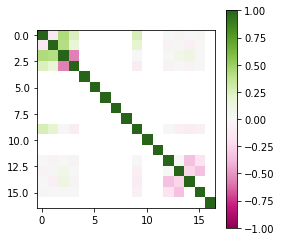

In [14]:
cond_coeff_mat_tensor = torch.stack(cond_coeff_mat_list, dim=0)

#take average:
cond_coeff_mat_av = torch.nanmean(cond_coeff_mat_tensor, dim=0)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat_av, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)